# **Supply Chain Analysis Project**

---

### **Team Members:**

- *Amira Gaber Mohamed* (Team Leader)
- *Nagham Sabry Ahmed*
- *Abdel Rahman Saeed Ahmed*
- *Rokaya Mohamed Saeed*
- *Yahia Wael Hamad*

---

### **Under supervision of:**
- *Eng.Alaa Gamal*
---
Steps used to achieve useful analysis and insights:
---
---
#### **[1] Data Collection:**
**Objective**: To gather the necessary data from various sources to create a comprehensive dataset for analysis.

**Steps**:
- **Identify Data Sources**: Determine where the data will come from (databases, spreadsheets, etc.).
- **Define Data Requirements**: Specify the type of data needed for the analysis, such as specific fields, metrics, and timeframes.
- **Data Acquisition**: Extract or collect the data from identified sources.
- **Document Collection Process**: Record the methodology and tools used to collect the data for transparency and reproducibility.
---
#### **[2] Data Cleaning:**
**Objective**: To ensure that the data is accurate, complete, and free of errors, preparing it for analysis.

**Steps**:
- **Data Validation**: Check for any inconsistencies, such as missing, duplicated, or out-of-range values.
- **Handling Missing Data**: Decide on an approach for missing data (e.g., imputation, removal, or filling with default values).
- **Data Transformation**: Standardize and normalize data formats (e.g., date formats, numerical units, etc.).
- **Outlier Detection**: Identify and address outliers that may distort analysis.
- **Remove Redundant or Irrelevant Data**: Filter out any data that doesn't contribute to the analysis or is irrelevant to the objectives.
---

#### **[3] Data Analysis:**
**Objective**: To derive meaningful insights and patterns from the cleaned data to inform decisions.

**Steps**:
- **Descriptive Analysis**: Calculate basic statistics (mean, median, mode, standard deviation, etc.) to understand the data distribution.
- **Exploratory Data Analysis (EDA)**: Use visualization tools (charts, graphs) to explore the relationships between variables.
- **Hypothesis Testing**: Apply statistical tests to confirm or refute assumptions.
- **Optimization**: Analyze the data to optimize key business processes, such as supply chain operations, pricing strategies, or resource allocation.
- **Segmentation**: If applicable, segment the data into meaningful groups to understand different patterns or behaviors.
---
#### **[4] Data Presentation(Visualization):**
**Objective**: To communicate the analysis findings in a clear and actionable way to stakeholders.

**Steps**:
- **Identify Audience**: Understand the stakeholders’ needs and their level of understanding regarding the data and findings.
- **Summarize Key Insights**: Focus on the most important findings that directly impact business goals or decisions.
- **Use Visualizations**: Create charts, graphs, and tables to make complex data more digestible.
- **Storytelling**: Present the analysis in a narrative form, explaining the "why" and "how" behind the results, and tying them to business objectives.
- **Provide Recommendations**: Based on the analysis, offer actionable insights or suggestions for improvement.

---
# Data exploration and cleaning
---



In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sqlalchemy import create_engine


In [101]:
Raw_data= pd.read_csv(r"C:\Users\Nagham Sabry\OneDrive\Desktop\DEPI Project\supply_chain_data.csv")

In [102]:
print(f"The raw dataset contains {Raw_data.shape[0]} rows and {Raw_data.shape[1]} columns.\n")

The raw dataset contains 100 rows and 24 columns.



In [103]:
Raw_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [104]:
server = 'LAPTOP-SO4VJ86F'
database = 'master'
username = ''
password = ''

connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)

#### SQL Queries to add columns, set the clusters and conditional columns

In [105]:
query = """SELECT
    *,
    --- Availability clustering
    CASE
        WHEN [Availability] >= (SELECT AVG([Availability]) FROM SC)
        THEN 'High'
        ELSE 'Low'
    END AS [Availability cluster],
    ---Stock clustering
    CASE
        WHEN [Stock levels] >= (SELECT AVG([Stock levels]) FROM SC)
        THEN 'High'
        ELSE 'Low(at risk)'
    END AS [Stock cluster],
	---Profit Calculation
    [Revenue generated] - [Manufacturing costs] - [Shipping costs] AS [Profit],
	---Total Lead Time Calculation
	[Manufacturing lead time] + [Shipping times] AS [Total Lead Time],
	---Shipping cost per unit Calculation
	[Shipping costs] / [Number of products sold] AS [shipping_cost_per_unit]

FROM
    SC;
"""

> Here columns like `Profit`, `Total Lead Time`, and `shipping_cost_per_unit` were added to help seeing and exploring more insights.

#### Get the data from the last edited database source

In [106]:
df =  pd.read_sql(query, con=engine)

#### Show the first rows of data to get familiar with

In [107]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Availability cluster,Stock cluster,Profit,Total Lead Time,shipping_cost_per_unit
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,High,High,8612.760341,33,0.003686
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,High,High,7417.566722,32,0.013202
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,Low,Low(at risk),9539.007127,29,1.006810
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,High,Low(at risk),7729.482116,24,0.020838
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,Low,Low(at risk),2590.549443,11,0.004467


In [108]:
df.columns.values

array(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated',
       'Customer demographics', 'Stock levels', 'Lead times',
       'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'Availability cluster',
       'Stock cluster', 'Profit', 'Total Lead Time',
       'shipping_cost_per_unit'], dtype=object)

#### Supply Chain Dataset Metadata(columns' description)
| Column Name                  | Description                                       |
|-------------------------------|---------------------------------------------------|
| Product type                  | Category/type of product being sold               |
| SKU                           | Unique product identifier (Stock Keeping Unit)    |
| Price                         | Price per unit of the product                     |
| Availability                  | Product availability percentage                   |
| Number of products sold       | Total units sold                                  |
| Revenue generated             | Total revenue from product sales                  |
| Customer demographics         | Information about customer groups (Gender)        |
| Stock levels                  | Number of units currently in stock                |
| Lead times                    | Time taken to deliver products                    |
| Order quantities              | Number of units ordered                           |
| Shipping times                | Time taken to ship products                       |
| Shipping carriers             | Shipping service provider name                    |
| Shipping costs                | Cost incurred for shipping                        |
| Supplier name                 | Name of the product supplier                      |
| Location                      | Supplier or warehouse location                    |
| Lead time                     | Supplier delivery time                            |
| Production volumes            | Quantity of products manufactured                 |
| Manufacturing lead time       | Time taken to manufacture the product             |
| Manufacturing costs           | Cost to manufacture the product                   |
| Inspection results            | Quality inspection result (e.g., Pass/Fail)       |
| Defect rates                  | Percentage of defective products                  |
| Transportation modes          | Mode of transport used (e.g., air, road, sea)     |
| Routes                        | Routes followed for shipping                      |
| Costs                         | Transportation or additional costs                |
| Availability cluster          | Grouping based on availability (High/Low)         |
| Stock cluster                 | Grouping based on stock levels (High/Low at risk) |
| Profit                        | Revenue - Manufacturing costs - Shipping costs    |
| Total Lead Time               | Sum of Manufacturing lead time and Shipping times |
| defect_rate %                 | Defect rate percentage                            |
| shipping_cost_per_unit        | Shipping cost per individual unit                 |

---
**Notes**:
- Some columns are engineered (calculated from other columns), like `Profit`, `Total Lead Time`, `defect_rate %`, and `shipping_cost_per_unit`.


In [109]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

np.False_

> Data has no duplicate rows

In [110]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
Availability cluster       0
Stock cluster              0
Profit                     0
Total Lead Time            0
shipping_cost_per_unit     0
dtype: int64

> All columns have no null values

In [111]:
df.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Profit,Total Lead Time,shipping_cost_per_unit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782,5723.233345,20.52000,0.037743
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696,2739.385370,9.27523,0.109972
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248,1052.424038,2.00000,0.001544
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455,2751.791865,12.00000,0.007025
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444,5958.072985,20.00000,0.013382
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231,8178.860299,29.00000,0.027101
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450,9847.492129,38.00000,1.006810


> As shown .describe() function gives `count(no.of rows)`, `mean(average)`, `std(Standard deviation)`, `min`, `max`, `25% percentile(1st quartile\ Median)` ,`25% percentile(2st quartile)`, `75% percentile(3st quartile)` for each *Numeric* column

#### 1. Price:

- **Mean**: Average price of products = **49.56**
- **Min**: Minimum price reached = **1.69**
- **Max**: Maximum price reached = **99.17**
- **50% Percentile (Median)**: **51.23**

- **Skewness Conclusion:**
Since the **Mean (49.56)** is **less than** the **Median (51.23)**, we conclude that the data is **slightly left skewed**, though it is **almost normally distributed**.
- **Skewness**: **Left skewed** (or **negative skew**), meaning there might be a few products priced significantly lower than the majority.
- **Distribution**: Close to a **normal distribution** due to the small difference between the Mean and Median.


#### 2. Availability:

- **Mean**: Average availability = **48.40**
- **Min**: Minimum availability = **1.00**
- **Max**: Maximum availability = **100.00**
- **50% Percentile (Median)**: **43.50**

- **Skewness Conclusion:**
Since the **Mean (48.40)** is **greater than** the **Median (43.50)**, we conclude that the data is **Right Skewed**.
- **Skewness**: The distribution is **Right Skewed** (or **Positive Skew**), indicating some products with **unusually high availability** compared to the majority.
- **Distribution**: **Positive skew**, with a few products having significantly higher availability than the others.


#### 3. Number of products sold:
- **Mean**: Average number of products sold = **460.99 ~ 461 items**
- **Min**: Minimum number of products sold = **8**
- **Max**: Maximum number of products sold = **996**
- **50% Percentile (Median)**: **392.50**

- **Skewness Conclusion:**
Since the **Mean (460.99)** is **greater than** the **Median (392.50)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), meaning there might be a few products with **significantly higher sales** than the majority.
- **Distribution**: Close to a **normal distribution** due to the small difference between the Mean and Median.


#### 4. Revenue Generated:
- **Mean**: Average revenue = **5776.05**
- **Min**: Minimum revenue = **1061.62**
- **Max**: Maximum revenue = **9866.47**
- **50% Percentile (Median)**: **6006.35**

- **Skewness Conclusion**:
Since the **Mean (5776.05)** is **less than** the **Median (6006.35)**, we conclude that the data is **Left skewed**.
- **Skewness**: **Left skewed** (or **Negative skew**), indicating that there are a few **lower-revenue items** pulling the average down.
- **Distribution**: The data is **slightly negatively skewed**, suggesting that a few products have **lower revenue** compared to the rest.


 #### 5. Stock Levels:
- **Mean**: Average stock level = **47.77**
- **Min**: Minimum stock level = **0.00**
- **Max**: Maximum stock level = **100.00**
- **50% Percentile (Median)**: **47.50**

- **Skewness Conclusion**:
Since the **Mean (47.77)** is very close to the **Median (47.50)**, we conclude that the data has a **near-normal distribution**.
- **Skewness**: **Approximately symmetric**, suggesting the data is nearly normally distributed.
- **Distribution**: The data is **almost perfectly normal**, which indicates that the inventory levels are well-balanced.


#### 6. Order Quantities:
- **Mean**: Average order quantity = **49.22 ~ 49 items**
- **Min**: Minimum order quantity = **1.00**
- **Max**: Maximum order quantity = **96.00**
- **50% Percentile (Median)**: **52.00**

- **Skewness Conclusion**:
Since the **Mean (49.22)** is **less than** the **Median (52.00)**, we conclude that the data is **Left skewed**.
- **Skewness**: **Left skewed** (or **Negative skew**), suggesting that some **smaller orders** are pulling the average down.
- **Distribution**: The data is **slightly negatively skewed**, with a few smaller orders contributing to a lower average order quantity.

#### 8. Shipping Times:
- **Mean**: Average shipping time = **5.75 days**
- **Min**: Minimum shipping time = **1.00 day**
- **Max**: Maximum shipping time = **10.00 days**
- **50% Percentile (Median)**: **6.00 days**

- **Skewness Conclusion**:
Since the **Mean (5.75)** is **less than** the **Median (6.00)**, we conclude that the data is **slightly Left skewed**.
- **Skewness**: **Left skewed** (or **Negative skew**), suggesting some **faster shipping routes or methods**.
- **Distribution**: The data is **slightly negatively skewed**, with a few shipments being delivered **faster than others**.

#### 9. Shipping Costs:
- **Mean**: Average shipping cost = **5.54**
- **Min**: Minimum shipping cost = **1.01**
- **Max**: Maximum shipping cost = **9.93**
- **50% Percentile (Median)**: **5.32**

- **Skewness Conclusion**:
Since the **Mean (5.54)** is **greater than** the **Median (5.32)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), indicating some shipments with **higher shipping costs**.
- **Distribution**: The data is **slightly positively skewed**, with a few shipments having **significantly higher costs** than the majority.


#### 10. Lead Time:
- **Mean**: Average lead time = **17.08 days**
- **Min**: Minimum lead time = **1.00 day**
- **Max**: Maximum lead time = **30.00 days**
- **50% Percentile (Median)**: **18.00 days**

- **Skewness Conclusion**:
Since the **Mean (17.08)** is **less than** the **Median (18.00)**, we conclude that the data is **slightly Left skewed**.
- **Skewness**: **Left skewed** (or **Negative skew**), suggesting some **faster lead times** pulling the average down.
- **Distribution**: The data is **slightly negatively skewed**, with a few **shorter lead times** influencing the average.

#### 11. Production Volumes:
- **Mean**: Average production volume = **567.84 units**
- **Min**: Minimum production volume = **104.00 units**
- **Max**: Maximum production volume = **985.00 units**
- **50% Percentile (Median)**: **568.50 units**

- **Skewness Conclusion**:
Since the **Mean (567.84)** is **very close to** the **Median (568.50)**, we conclude that the data is **nearly Normally distributed**.
- **Skewness**: The data is **approximately symmetric**, with no significant skew.
- **Distribution**: The data is **almost perfectly normal**, suggesting **consistent production planning**.

#### 12. Manufacturing Lead Time:
- **Mean**: Average manufacturing lead time = **14.77 days**
- **Min**: Minimum manufacturing lead time = **1.00 day**
- **Max**: Maximum manufacturing lead time = **30.00 days**
- **50% Percentile (Median)**: **14.00 days**

- **Skewness Conclusion**:
Since the **Mean (14.77)** is **greater than** the **Median (14.00)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), indicating that some **manufacturing processes** are taking longer than usual.
- **Distribution**: The data is **slightly positively skewed**, with a few manufacturing processes taking **longer than expected**.


#### 13. Manufacturing Costs:
- **Mean**: Average manufacturing cost = **47.27**
- **Min**: Minimum manufacturing cost = **1.09**
- **Max**: Maximum manufacturing cost = **99.47**
- **50% Percentile (Median)**: **45.91**

- **Skewness Conclusion**:
Since the **Mean (47.27)** is **greater than** the **Median (45.91)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), suggesting that some products have **higher manufacturing costs**.
- **Distribution**: The data is **slightly positively skewed**, with a few items having **higher manufacturing costs**.

#### 14. Defect Rates:
- **Mean**: Average defect rate = **2.28%**
- **Min**: Minimum defect rate = **0.02%**
- **Max**: Maximum defect rate = **4.94%**
- **50% Percentile (Median)**: **2.14%**

- **Skewness Conclusion**:
Since the **Mean (2.28%)** is **greater than** the **Median (2.14%)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), suggesting that some production runs have **higher defect rates**.
- **Distribution**: The data is **positively skewed**, with a few **higher defect rates** influencing the overall average.


#### 15. Costs:
- **Mean**: Average total cost = **529.25**
- **Min**: Minimum total cost = **103.91**
- **Max**: Maximum total cost = **997.41**
- **50% Percentile (Median)**: **520.43**

- **Skewness Conclusion**:
Since the **Mean (529.25)** is **greater than** the **Median (520.43)**, we conclude that the data is **Right skewed**.
- **Skewness**: **Right skewed** (or **Positive skew**), suggesting that some products have **significantly higher costs**.
- **Distribution**: The data is **slightly positively skewed**, with a few products having **higher total costs**.
---
>Notes:
- **Stock Levels**:
  - Stock levels are well-managed, with a near-normal distribution centered around the **47.5%** mark.
  - Indicates balanced inventory management.

- **Lead Times**:
  - Lead times show some variation but generally average around **16 days**.
  - Some suppliers deliver significantly faster.

- **Revenue Distribution**:
  - Suggests there may be a few underperforming products.
  - Some items generate notably lower revenue than others.

- **Product Sales Volume**:
  - Sales volume is right-skewed.
  - Indicates some products are significantly more popular than others, resulting in a higher number of units sold for select products.

- **Order Quantities**:
  - Order quantities mostly cluster around the **median of 52 units**.
  - Some smaller orders are less frequent.

##### **Production Efficiency**:
- **Production Volumes**:
  - Nearly normally distributed around **568 units**.
  - Suggests consistent production planning.

- **Manufacturing Lead Times**:
  - Average around **15 days**, with some variation across suppliers.

- **Defect Rates**:
  - Average **2.28%**, with some higher outliers indicating occasional production issues.



##### **Cost Structure**:
- **Manufacturing Costs**:
  - Average **47.27**, contributing significantly to total costs (**mean = 529.25**).

- **Shipping Costs**:
  - Relatively consistent but show some variation, with an average of **5.54**.



##### **Time Factors**:
- **Total Lead Time**:
  - Averaging **17.08 days**, largely driven by **manufacturing lead time** (**14.77 days**).

- **Shipping Times**:
  - Average **5.75 days** with moderate variation.


##### **Optimization Opportunities**:
- Investigate processes that contribute to higher defect rates in certain batches.
- Address longer **manufacturing lead times** that are skewing the distribution.
- Evaluate **shipping routes or methods** that incur higher costs and consider optimizing them for efficiency.





# Data analysis and visualization
---

#### Creating a python function that returns the unique values of the column and their corresponding counts as the values using SQL to avoid redunduncy of the SQL code.

In [112]:
def valueCounts(col_name):
    #store the query in 'query' variable
    query = f"""SELECT [{col_name}], COUNT([{col_name}])
                FROM SC
                GROUP BY [{col_name}]
                ORDER BY COUNT([{col_name}]) DESC;"""

    # Return the result as a pandas DataFrame
    result = pd.read_sql(query, con=engine)
    return result

## Values counts in df given data

In [113]:
inspection_results_counts = valueCounts('Inspection results')
inspection_results_counts

,Inspection results,
0,Pending,41
1,Fail,36
2,Pass,23


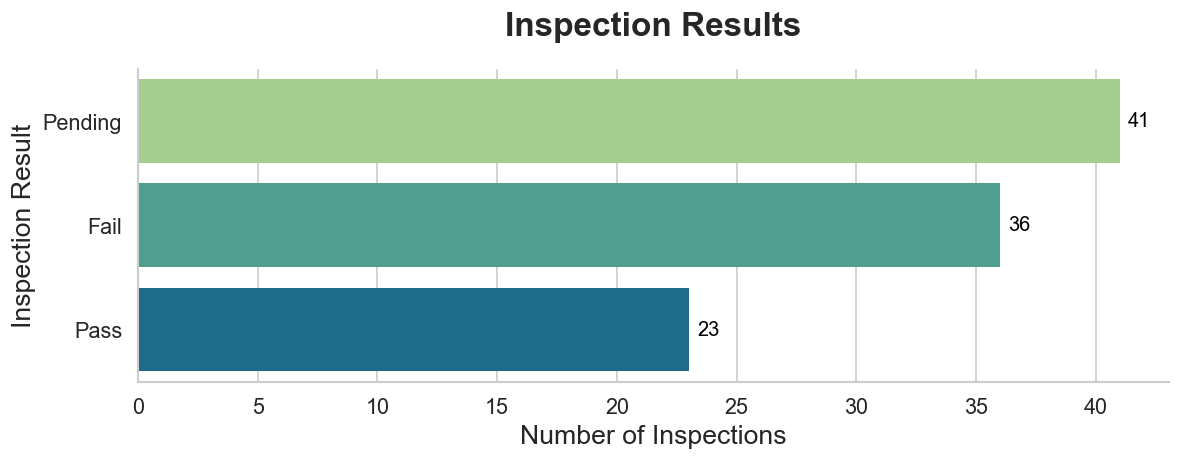

In [114]:
# Prepare Inspection Results Data
inspection_df = inspection_results_counts.reset_index().iloc[:, -2:]
inspection_df.columns = ['Inspection Result', 'Count']

# Set seaborn style
sns.set_style("whitegrid")

# Create a high-resolution figure
plt.figure(figsize=(10, 4), dpi=120)

# Create barplot with default color (no palette)
barplot = sns.barplot(
    data=inspection_df,
    x='Count',
    y='Inspection Result',
    edgecolor='none'
)

# Apply consistent colors manually using a colormap
cmap = plt.get_cmap('crest')  # or 'viridis', 'Blues', etc.
bars = barplot.patches
num_bars = len(bars)

for i, bar in enumerate(bars):
    color = cmap(i / num_bars)
    bar.set_facecolor(color)

# Title and labels
plt.title('Inspection Results', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of Inspections', fontsize=16)
plt.ylabel('Inspection Result', fontsize=16)

# Set tick label font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add values to the end of each bar
for p in bars:
    barplot.annotate(
        format(int(p.get_width()), ','),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left', va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=12,
        color='black'
    )

# Despine for a clean look
sns.despine()
plt.tight_layout()
plt.show()


> From inspection results we can see that pending case is the most frequent and really few products (23%) passes the test

In [115]:
demographics_counts = valueCounts('Customer demographics')
demographics_counts

,Customer demographics,
0,Unknown,31
1,Female,25
2,Non-binary,23
3,Male,21


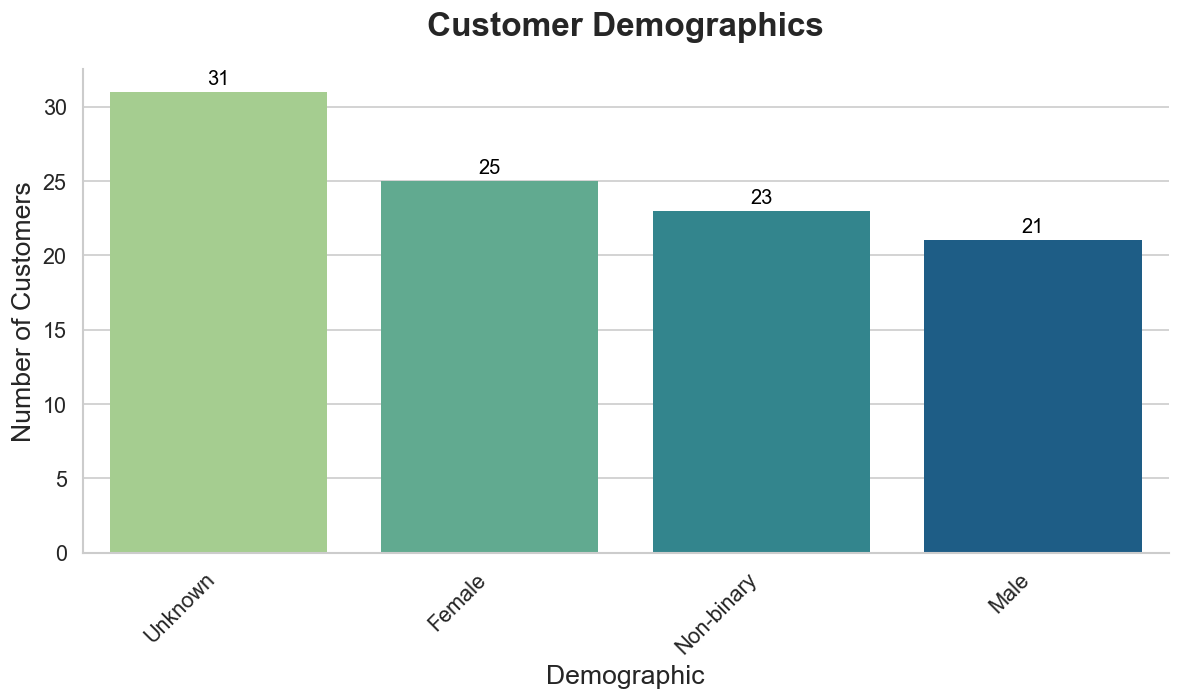

In [116]:
# Prepare Data
demographics_df = demographics_counts.reset_index().iloc[:, -2:]
demographics_df.columns = ['Demographic', 'Count']

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6), dpi=120)

# Plot with default colors
barplot = sns.barplot(
    data=demographics_df,
    x='Demographic',
    y='Count',
    edgecolor='none'
)

cmap = plt.get_cmap('crest')
bars = barplot.patches
num_bars = len(bars)

for i, bar in enumerate(bars):
    color = cmap(i / num_bars)
    bar.set_facecolor(color)

# Title and labels
plt.title('Customer Demographics', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Demographic', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)

# Tick labels
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# Add values on top of bars
for p in bars:
    barplot.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12,
        color='black'
    )

# Clean look
sns.despine()
plt.tight_layout()
plt.show()


> Unknown is the most common demographic value

In [117]:
location_counts = valueCounts('Location')
location_counts

,Location,
0,Kolkata,25
1,Mumbai,22
2,Chennai,20
3,Bangalore,18
4,Delhi,15


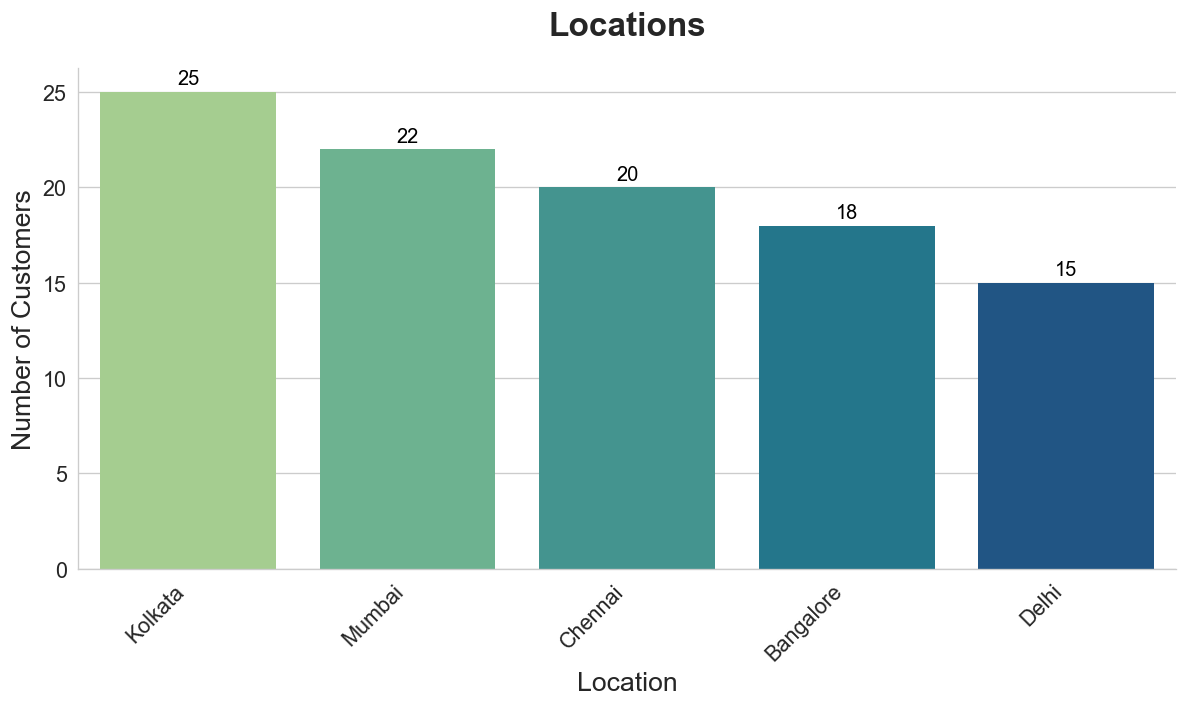

In [28]:
# Prepare Location Data
location_df = location_counts.reset_index().iloc[:, -2:]
location_df.columns = ['Location', 'Count']

# Set seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6), dpi=120)

barplot = sns.barplot(
    data=location_df,
    x='Location',
    y='Count',
    edgecolor='none'
)

# Apply colormap manually
cmap = plt.get_cmap('crest')
bars = barplot.patches
num_bars = len(bars)

for i, bar in enumerate(bars):
    bar.set_facecolor(cmap(i / num_bars))

# Title and labels
plt.title('Locations', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)

# Ticks styling
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# Add value labels on top of bars
for p in bars:
    barplot.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12,
        color='black'
    )

sns.despine()
plt.tight_layout()
plt.show()


> kolkata and Mumbai are the most active location suppliers

In [118]:
Product_type_counts  = valueCounts('Product type')
Product_type_counts

,Product type,
0,skincare,40
1,haircare,34
2,cosmetics,26


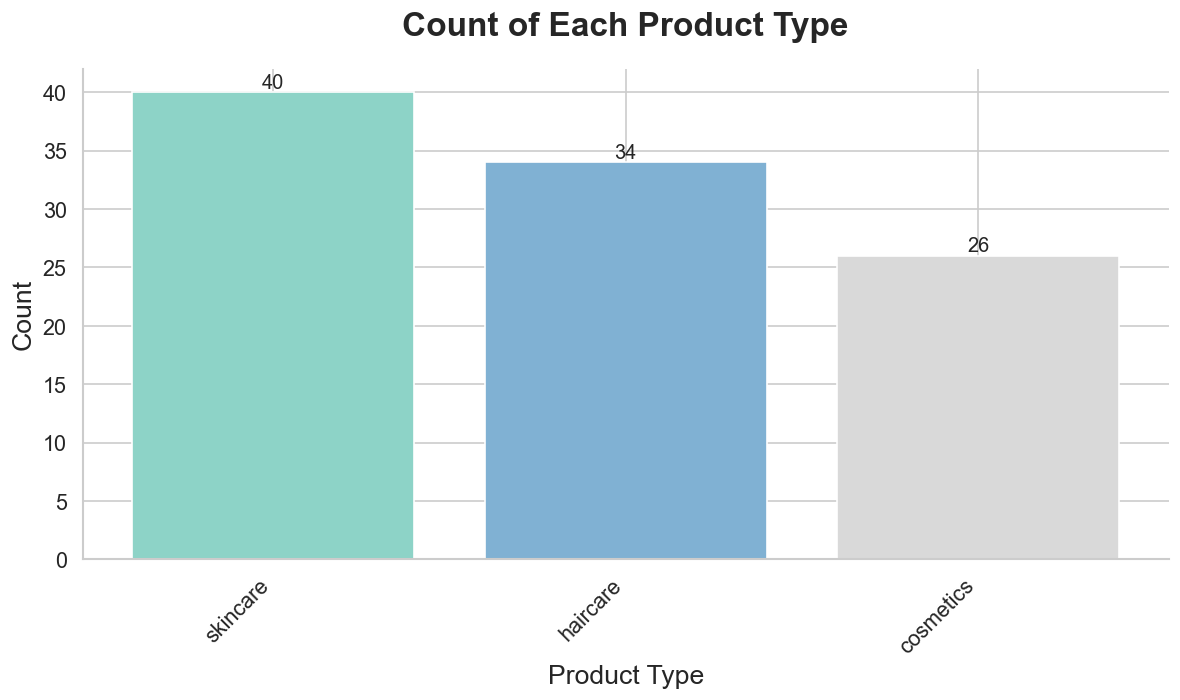

In [119]:
# Prepare Data
Product_type_df = Product_type_counts.reset_index().iloc[:, -2:]
Product_type_df.columns = ['Demographic', 'Count']

# Generate harmonious colors manually from a colormap
num_bars = len(Product_type_df)
cmap = plt.get_cmap('Set3')
colors = [cmap(i / num_bars) for i in range(num_bars)]

# Set seaborn style
sns.set_style("whitegrid")

# Create a high-resolution figure
plt.figure(figsize=(10, 6), dpi=120)

# Create the barplot manually with assigned colors
barplot = plt.bar(
    Product_type_df['Demographic'],
    Product_type_df['Count'],
    color=colors
)

# Title and labels
plt.title('Count of Each Product Type', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Product Type', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# Add values on top of bars
for bar in barplot:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height()):,}",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Clean up
sns.despine()
plt.tight_layout()
plt.show()


> As shown *Skincare type* is the most frequent type of products then *Haircare* then *Cosmetics*.

## Price distribution

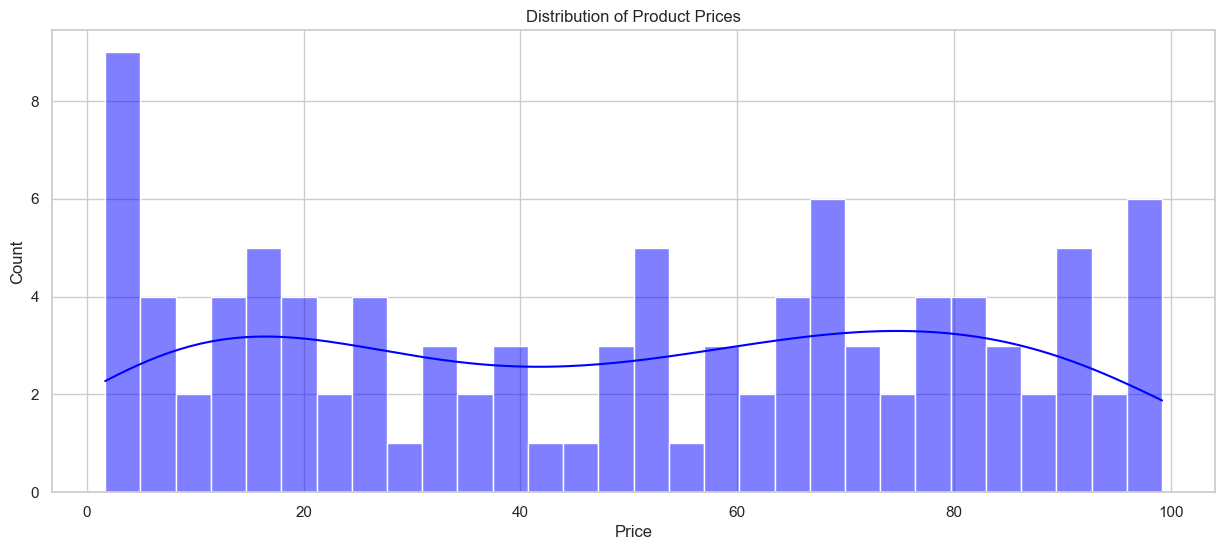

In [120]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#### Graph insights:

- The distribution of product prices is **irregular**, not following a typical bell-shaped (normal) curve.
- Prices are spread out across the full range from 0 to 100, showing no strong central tendency.
- There are noticeable spikes in product count at:
  -  Very low prices (~5)
  -  Very high prices (~95–100)
- This suggests clustering at price extremes — possibly due to:
  - Popularity of **budget products**
  - Availability of **premium-priced items**
- The middle price range (~40–60) has a **dip** in product frequency, indicating fewer mid-range products.

>
This pattern may indicate a **bimodal trend** or **market polarization**:
  - Two main segments: **low-cost essentials** and **premium offerings**
  - A **gap in mid-range products**



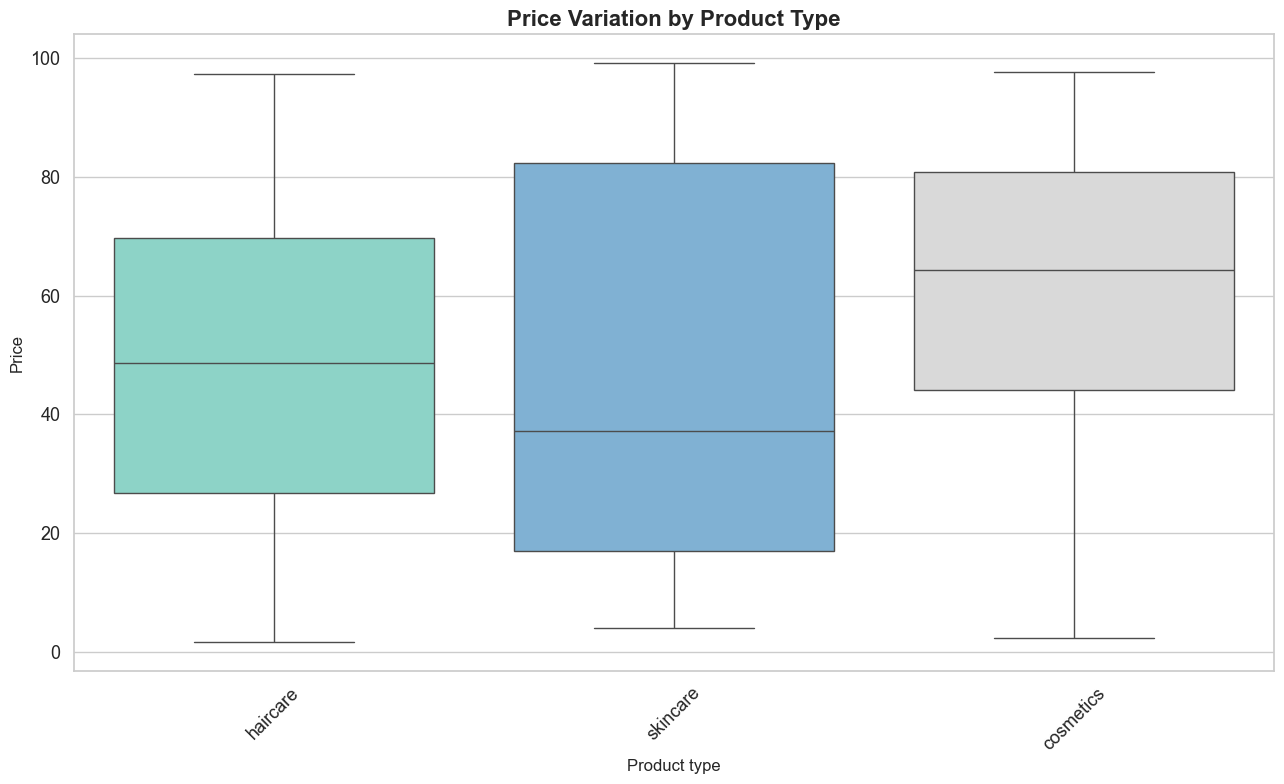

In [121]:
# Get unique product types
product_types = df['Product type'].unique()
num_types = len(product_types)

cmap = plt.get_cmap('Set3')
colors = [cmap(i / num_types) for i in range(num_types)]

# Plot
plt.figure(figsize=(13, 8))
boxplot = sns.boxplot(
    x="Product type",
    y="Price",
    data=df,

)

# Apply custom colors to each boxplot
for i, patch in enumerate(boxplot.patches):
    color = colors[i % num_types]  # Assign each box a color
    patch.set_facecolor(color)

# Title and labels
plt.title("Price Variation by Product Type", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()


### Insights from the Graph

#### > **Cosmetics**:
- Has the highest average price (i.e., the most expensive product type on average).
- Distribution is almost normal but slightly **left-skewed** (no single cosmetics product significantly impacts the overall shape).

#### > **Skincare**:
- Has the lowest average price (i.e., the cheapest product type on average).
- Shows the largest **InterQuartile Range (IQR)** among all categories.
- Has the **highest lower and upper bound prices** compared to others.
- **Right (+ve) skewed**: A few expensive skincare products contribute to the right tail of the distribution.

#### > **Haircare**:
- Is **normally distributed** (prices of products are very close to the mean).
- Has the **lowest lower and upper bound prices** among all product types.


## Correlations between all attributes in df

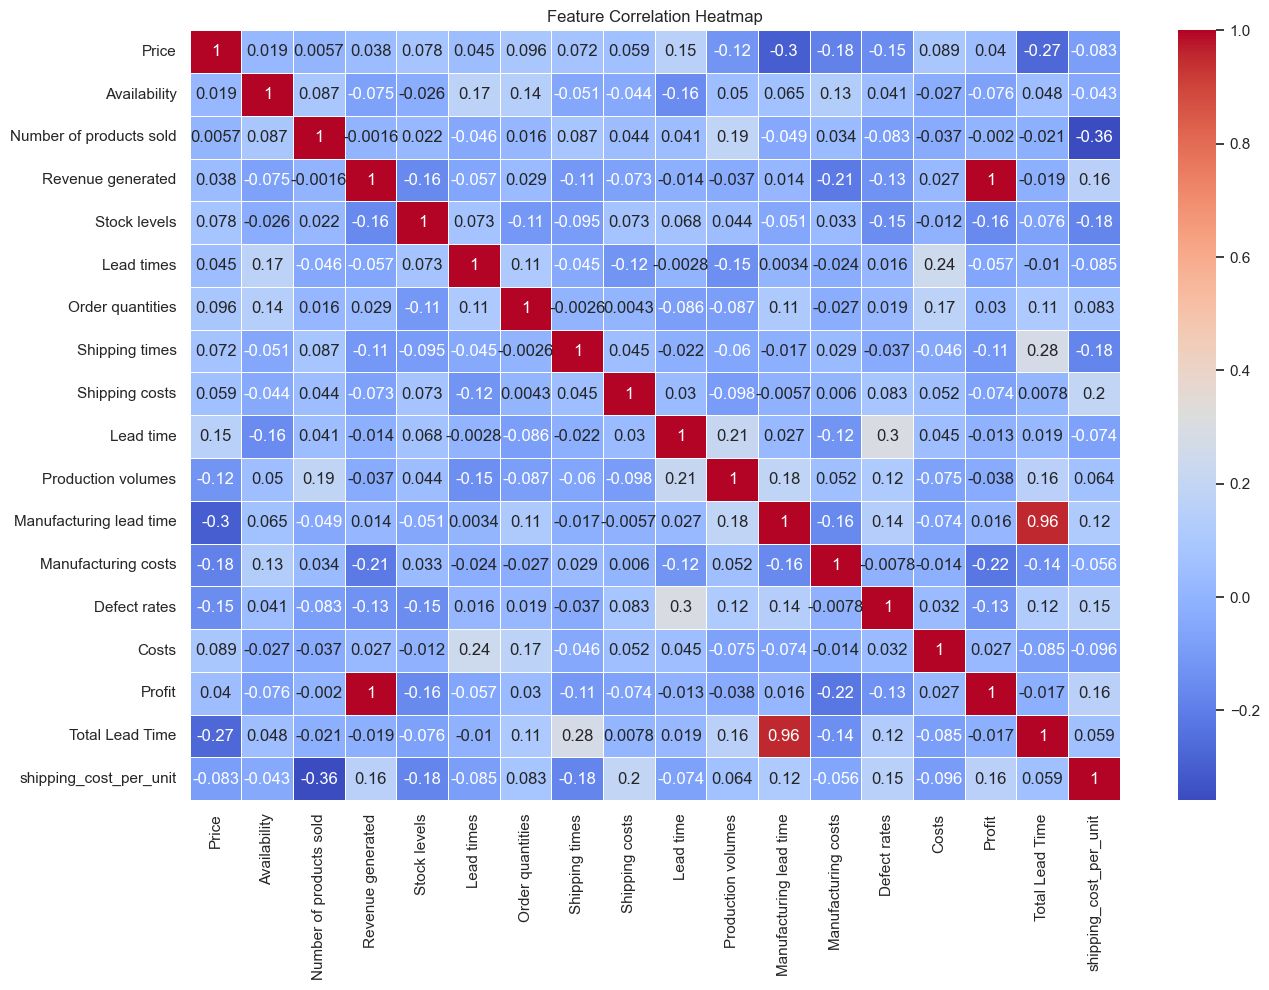

In [122]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### General Notes:
- Strongest negative correlation:
  - **Price ↔ Manufacturing lead time** (-0.30) which means that there is a mild(not strong) negative relationship between them price decreases by the increasing of the Manufacturing lead time and vice versa
- Strongest positive correlation:
  - **Profits ↔ Revenue generated** (1) which makes sense as profits = revenue generated - costs (Profits increase by the increasing of the revenue generated)
  - **Defect rates ↔ Lead time** (0.30) hich means that there is a mild(not strong) positive relationship between them defect rates decrease by the decreasing of the Lead time and vice versa


### Graph Observations:

- **Price**:
  - Mild positive relation with `Lead time` (0.15) A mild positive correlation means that as the price of a product increases slightly, the lead time (time to deliver or produce) also tends to increase — but the relationship is weak which means that premium or customized items may take slightly longer to produce or ship.

- **Availability**:
  - Slight positive correlation with `Lead times` (0.17) and `Order quantities` (0.14) which means:
     - Higher order quantities are weakly related to better availability — makes sense since large orders might be prioritized.
     - If lead times go up (slower supply), availability slightly improves — maybe due to buffer stocks or advanced planning.

- **Number of Products Sold**:
  - Very low correlation across all features (all values close to 0) which implies sales volume is likely influenced by external factors like marketing, demand, or seasonality, not internal supply chain metrics.

- **Revenue Generated**:
  - Slight positive link with `Production volumes` (0.21) and `Lead time` (0.13)

- **Production Volumes**:
  - Highest positive correlation with `Manufacturing lead time` (0.18) and `Lead time` (0.21) The more you produce, the more time it may take (mildly) — due to capacity limits or scheduling delays.

- **Manufacturing Lead Time**:
  - Positively correlated with `Production volumes` (0.18) and `Defect rates` (0.14) longer manufacturing processes might be more prone to defects, perhaps from complexity or outdated systems.
- **Costs**:
  - Slight positive correlation with `Revenue generated` (0.24) and `Order quantities` (0.17) more orders and more revenue generally mean higher costs, due to higher production, materials, or logistics expenses.

---




In [123]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Availability cluster,Stock cluster,Profit,Total Lead Time,shipping_cost_per_unit
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,High,High,8612.760341,33,0.003686
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,High,High,7417.566722,32,0.013202
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,Low,Low(at risk),9539.007127,29,1.006810
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,High,Low(at risk),7729.482116,24,0.020838
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,Low,Low(at risk),2590.549443,11,0.004467


## Profit, Revenue generated and Lead time by Availability & Stock Clusters

In [124]:
clusters = df.groupby(['Availability cluster', 'Stock cluster']).agg({
    'Revenue generated': 'sum',
    'Profit': 'mean',
    'Lead time': 'median'
}).reset_index()
clusters

,Availability cluster,Stock cluster,Revenue generated,Profit,Lead time
0,High,High,136475.492197,5398.133672,18.0
1,High,Low(at risk),140545.919860,5801.977483,14.0
2,Low,High,142695.466436,5444.121159,25.0
3,Low,Low(at risk),157887.940245,6263.015319,16.0


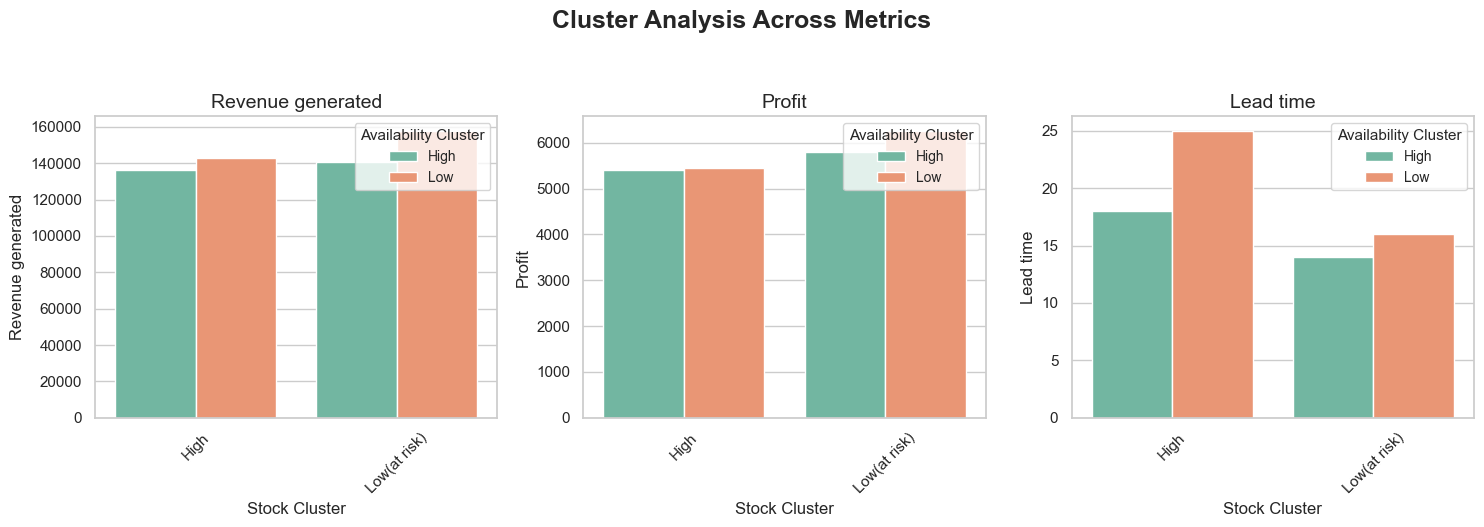

In [125]:
metrics = ['Revenue generated', 'Profit', 'Lead time']
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

for idx, metric in enumerate(metrics):
    sns.barplot(
        data=clusters,
        x='Stock cluster',
        y=metric,
        hue='Availability cluster',
        ax=axes[idx],
        palette='Set2'
    )
    axes[idx].set_title(f"{metric}", fontsize=14)
    axes[idx].set_xlabel('Stock Cluster', fontsize=12)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Availability Cluster', fontsize=10, title_fontsize=11)

plt.suptitle('Cluster Analysis Across Metrics', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


### Cluster-Based Analysis Summary
#### **1. Revenue Generated**
- **Low Availability Cluster** generates more revenue than High Availability across both Stock Clusters.
- For the **High Stock Cluster**, revenue is higher when **availability is Low**.
- Similarly, in the **Low (At-Risk) Stock Cluster**, Low availability still yields **slightly higher revenue**.

  **SO:**:
    Counterintuitively, lower availability might be linked with **higher urgency or pricing power**, leading to **more revenue generation**.

---

#### **2. Profit**
- **Low (At-Risk) Stock Cluster** shows higher profits than the High Stock Cluster, **regardless of availability**.
- Within each stock cluster, **profit is very similar** between High and Low availability.

  **SO** :
   - Profitability is more dependent on the **stock risk level** than availability.
   - Low stock might be more **optimally priced or cost-efficient**.

---

#### **3. Lead Time**
- Lead time increases significantly when **availability is Low**, especially in the **High Stock Cluster**.
- In the Low Stock Cluster, lead times are **lower overall**, but still **higher when availability is Low**.

  **SO**:
    **Low availability** contributes to **longer lead times**, possibly due to **stockouts or supply chain delays**.

---

> #### **Summary**
-  **Revenue** is maximized with **Low Availability**, possibly due to **scarcity-based demand** or **premium pricing**.
-  **Profit margins** are more favorable in **Low (At-Risk) Stock Clusters**, suggesting **efficiency or strategic pricing**.
-  **Lead times** worsen with **Low Availability**, which may risk **customer satisfaction** or **service levels**.

---



## Which phase takes more time (Manufacturing or shipping)?

In [126]:
correlation_manufacturing = df['Manufacturing lead time'].corr(df['Total Lead Time']).round(3)
correlation_manufacturing

np.float64(0.956)

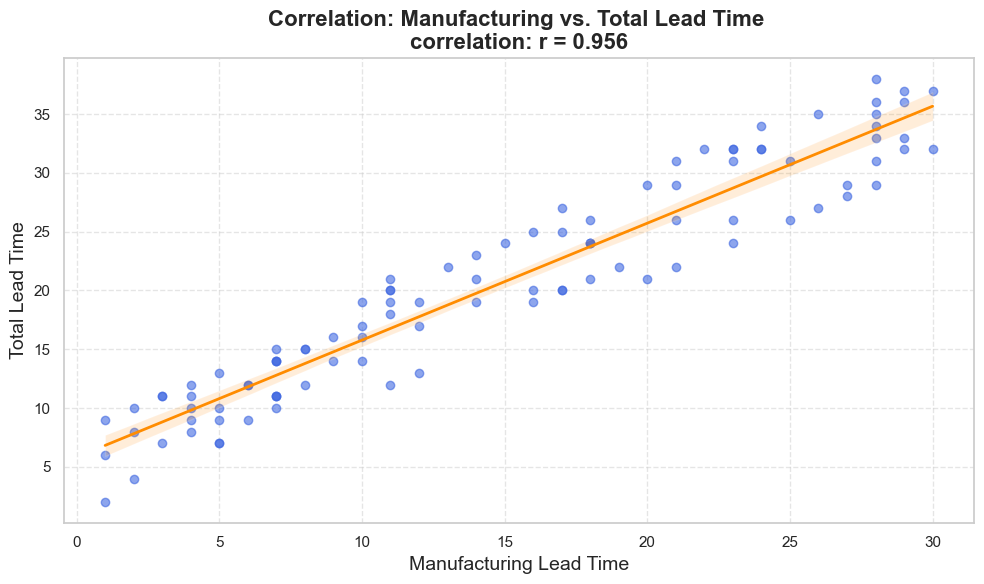

In [127]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Manufacturing lead time',
    y='Total Lead Time',
    scatter_kws={'alpha': 0.6, 'color': 'royalblue'},
    line_kws={'color': 'darkorange', 'linewidth': 2}
)

plt.title("Correlation: Manufacturing vs. Total Lead Time \ncorrelation: r = 0.956", fontsize=16, fontweight='bold')
plt.xlabel("Manufacturing Lead Time", fontsize=14)
plt.ylabel("Total Lead Time", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [128]:
correlation_shipping = df['Shipping times'].corr(df['Total Lead Time']).round(3)
correlation_shipping

np.float64(0.277)

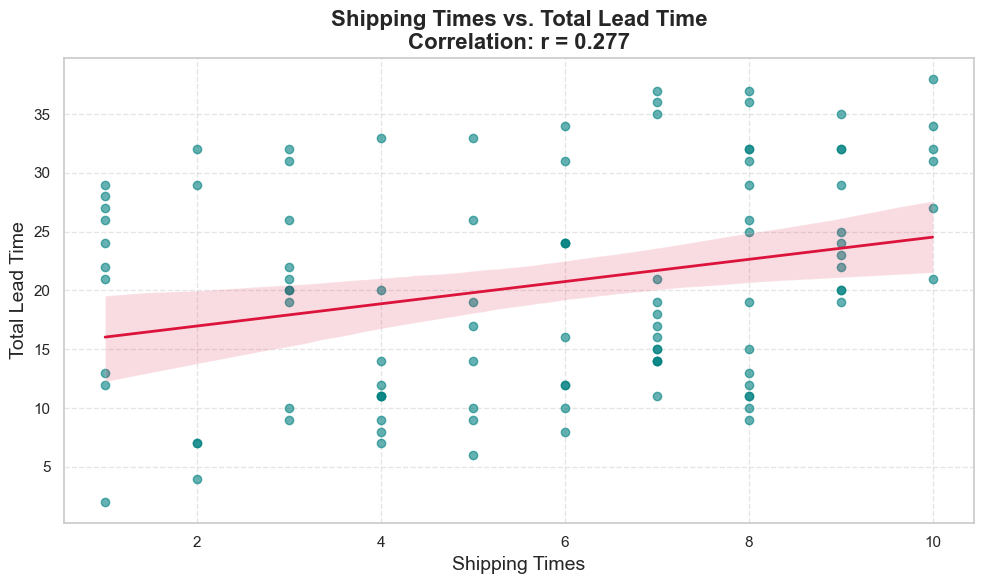

In [129]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Shipping times',
    y='Total Lead Time',
    scatter_kws={'alpha': 0.6, 'color': 'teal'},
    line_kws={'color': 'crimson', 'linewidth': 2}
)

# Title and labels
plt.title(f"Shipping Times vs. Total Lead Time\nCorrelation: r = 0.277", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Times", fontsize=14)
plt.ylabel("Total Lead Time", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


> **From the previous 2 correlation graphs we can say:** Manufacturing time contributes more effectively in the aumentation of the total lead time while the shipping time has less effect

## foreach_aggfunc function

In [131]:
def foreach_avg(index, value):
  return df.groupby(index)[value].mean().reset_index()
def foreach_sum(index, value):
  return df.groupby(index)[value].sum().reset_index()
def foreach_count(index, value):
  return df.groupby(index)[value].count().reset_index()

## Locations purchasing behaviour

In [132]:
locsku = foreach_sum('Location','Order quantities')\
.rename(columns = {'Order quantities':'Total_ordered_Quantity'})
locsku=locsku.sort_values(by='Total_ordered_Quantity', ascending=False)
locsku

,Location,Total_ordered_Quantity
3,Kolkata,1228
1,Chennai,1109
4,Mumbai,1083
0,Bangalore,769
2,Delhi,733


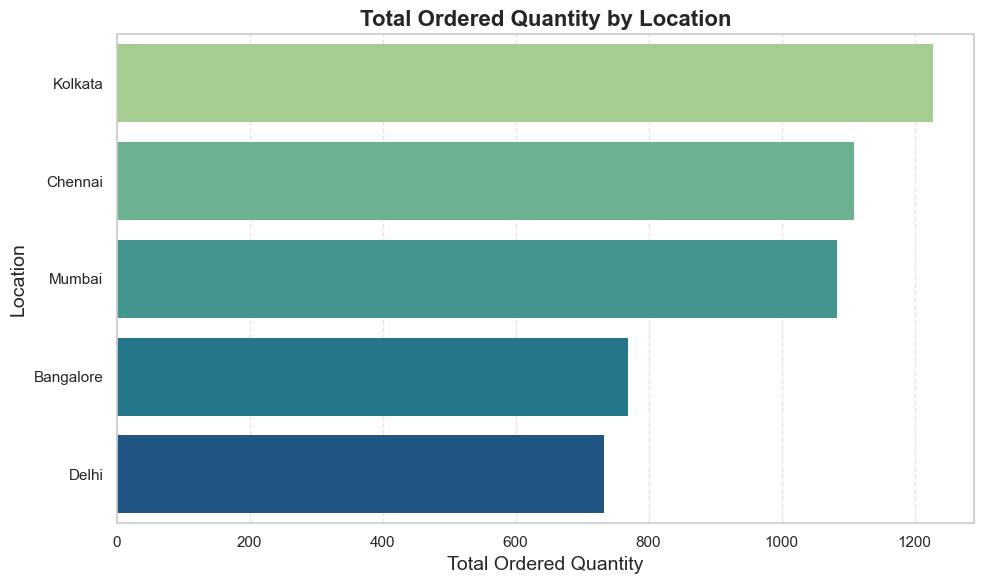

In [133]:
cmap = plt.get_cmap('crest')
colors = [cmap(i / len(locsku)) for i in range(len(locsku))]

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=locsku,
    x='Total_ordered_Quantity',
    y='Location',
    edgecolor='none'
)

# Apply custom colors to each bar
for i, patch in enumerate(barplot.patches):
    color = colors[i % len(colors)]  # Apply different colors to each bar
    patch.set_facecolor(color)

# Title and labels
plt.title("Total Ordered Quantity by Location", fontsize=16, fontweight='bold')
plt.xlabel("Total Ordered Quantity", fontsize=14)
plt.ylabel("Location", fontsize=14)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


> #### **Insights**:
   - **Kolkata**:
     - Has the highest total ordered quantity, might have higher demand, more customers, or better sales strategy.


   - **Bangalore and Delhi**:
     - Are at the lower end, with Delhi having the lowest order volume among all, might need attention—possibly in marketing, supply chain, or customer engagement.


#### Most common product type for each location

In [134]:
productsforloc = (
    df.groupby('Location')['Product type']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={'Product type': 'Most common product'})
)
productsforloc

,Location,Most common product
0,Bangalore,haircare
1,Chennai,skincare
2,Delhi,cosmetics
3,Kolkata,skincare
4,Mumbai,cosmetics


#### Locations contribution in profits

In [135]:
profitloc= foreach_sum('Location','Profit')\
.rename(columns={'Profit':'Total profit'})\
.sort_values(by='Total profit', ascending=False)
profitloc

,Location,Total profit
4,Mumbai,136809.468699
3,Kolkata,135886.937605
1,Chennai,118026.133302
0,Bangalore,101382.342274
2,Delhi,80218.452627


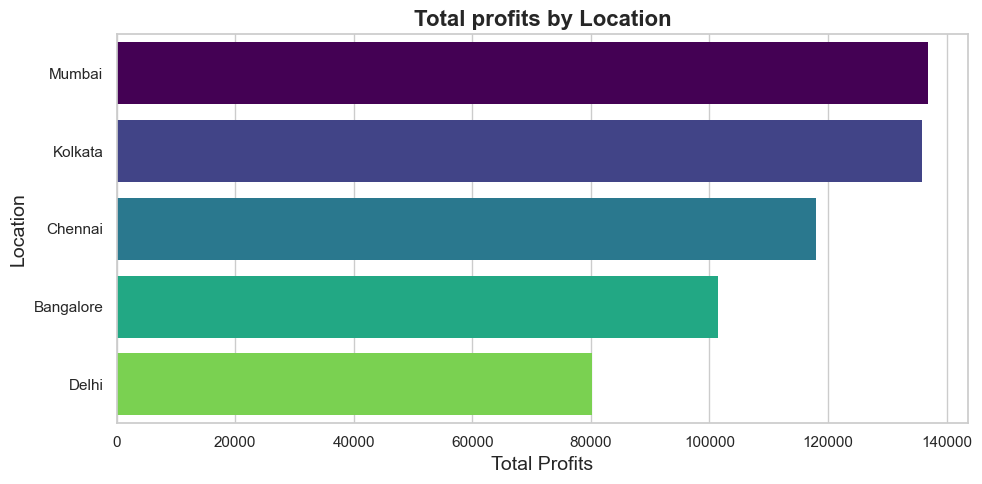

In [136]:
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(profitloc)) for i in range(len(profitloc))]

# Plot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    x='Total profit',
    y='Location',
    data=profitloc,
    edgecolor='none'
)

# Apply custom colors to each bar
for i, patch in enumerate(barplot.patches):
    color = colors[i % len(colors)]  # Apply different colors to each bar
    patch.set_facecolor(color)

# Title and labels
plt.title('Total profits by Location', fontsize=16, fontweight='bold')
plt.xlabel('Total Profits', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


> `Mumbai` & `Kolkata` have the *highest* contribution in total profits while `Delhi` contributes the *least*

In [137]:
profit_facet = df.groupby(['Location', 'Product type'])['Profit'].sum().reset_index()


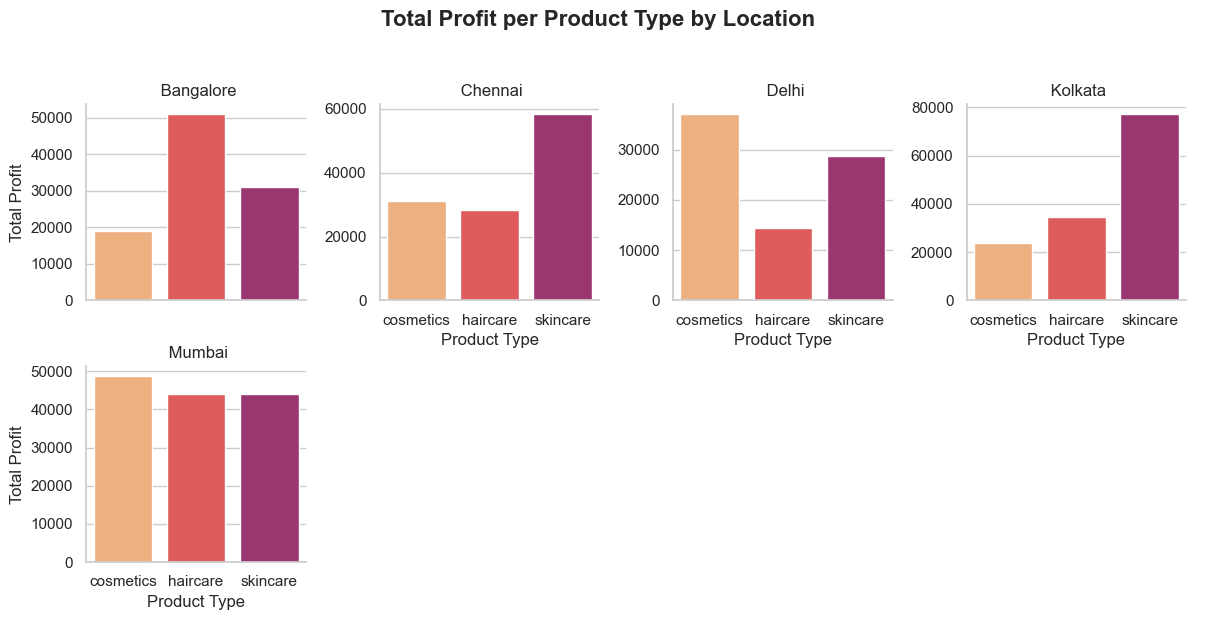

In [139]:
# Generate harmonious colors using colormap
cmap = plt.get_cmap('flare')
num_categories = len(profit_facet['Product type'].unique())  # Number of product types
colors = [cmap(i / num_categories) for i in range(num_categories)]  # Create list of colors based on product types

# Create the FacetGrid plot
g = sns.catplot(
    data=profit_facet,
    x='Product type',
    y='Profit',
    col='Location',
    kind='bar',
    col_wrap=4,
    height=3,
    aspect=1,
    sharey=False
)

# Set the titles and axis labels
g.set_titles(" {col_name}")
g.set_axis_labels("Product Type", "Total Profit")
g.fig.suptitle("Total Profit per Product Type by Location", fontsize=16, fontweight='bold', y=1.03)

# Apply custom colors to each bar in each facet
for ax in g.axes.flat:
    for i, patch in enumerate(ax.patches):
        patch.set_facecolor(colors[i % len(colors)])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### **Graph insights**:
- **Bangalore**:
   - Haircare is the most contributing product type in its total profits due to higher purchasing behaviour or region interests .
   - Cosmetics is the least contributing product type in its total profits due to lower purchasing behaviour or supplying issues
- **Chennai**:
   - Skincare is the most contributing product type in its total profits due to higher purchasing behaviour or region interests .
   - Cosmetics & Haircare are the least contributing product types in its total profits (Really close) due to lower purchasing behaviour or supplying issues
- **Delhi**:
   - Cosmetics is the most contributing product type in its total profits due to higher purchasing behaviour or region interests .
   - Haircare is the least contributing product type in its total profits (Really close) due to lower purchasing behaviour or supplying issues
- **Kolkata**:
   - Skincare is the most contributing product type in its total profits (Huge difference) due to higher purchasing behaviour or region interests .
   - Cosmetics & Haircare are the least contributing product types in its total profits (Really close) due to lower purchasing behaviour or supplying issues
- **Mumbai**:
   - Cosmetics is the most contributing product type in its total profits due to higher purchasing behaviour or region interests .
   - Skincare & Haircare are the least contributing product types in its total profits (Really close) due to lower purchasing behaviour or supplying issues
> **Conclusion**:
       - Haircare is the least contributing in profits while skincare and cosmetics have higher contribution due to trends, quantity demanded or supplier and customer preferences.

## Costumers purchasing behaviour

In [140]:
productsfordemo = (
    df.groupby('Customer demographics')['Product type']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={'Product type': 'Most common product'})
)
productsfordemo

,Customer demographics,Most common product
0,Female,skincare
1,Male,haircare
2,Non-binary,skincare
3,Unknown,haircare


> Female and non_binary have higher purchasing behaviour towards Skincare products while Male and Unknown Have it towards Haircare products.

#### Gender contribution in profits

In [141]:
profitDemo= foreach_sum('Customer demographics','Profit')\
.rename(columns={'Profit':'Total profit'})\
.sort_values(by='Total profit', ascending=False)
profitDemo

,Customer demographics,Total profit
3,Unknown,171482.158053
0,Female,160151.883733
1,Male,125565.546214
2,Non-binary,115123.746507


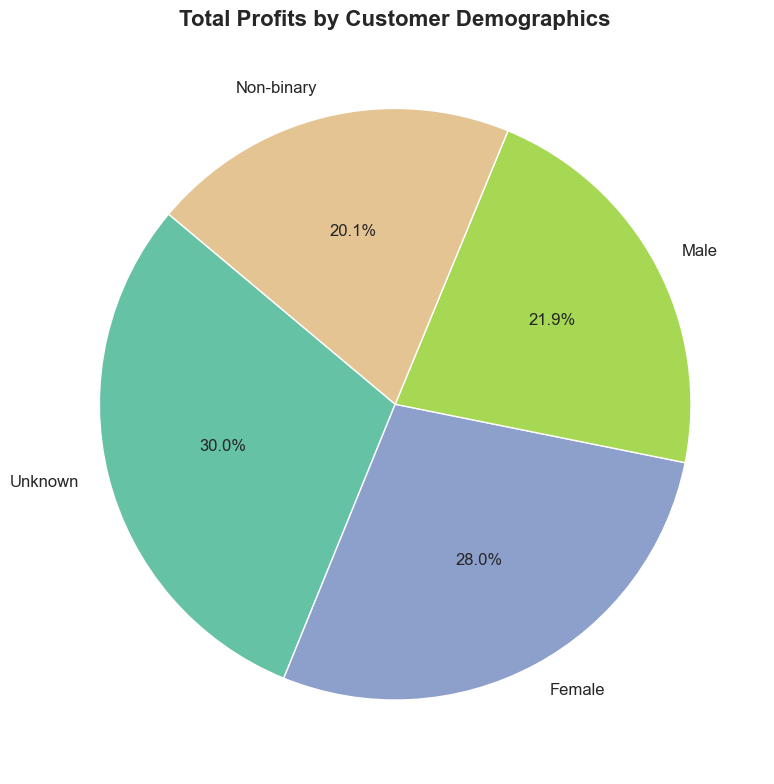

In [142]:
# Prepare data
pie_data = profitDemo.reset_index()
labels = pie_data['Customer demographics']
sizes = pie_data['Total profit']

# Generate colors from colormap
cmap = plt.get_cmap('Set2')
colors = [cmap(i / len(labels)) for i in range(len(labels))]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

plt.title('Total Profits by Customer Demographics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


> `Unkown` & `females` have the *highest* contribution in total profits (30%, 28%) in order while `Non-binary` & `Males` have the *lowest* contribution (20.1%, 21.9%)

C:\Users\Nagham Sabry\AppData\Local\Temp\ipykernel_14112\2040860224.py:38: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Nagham Sabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


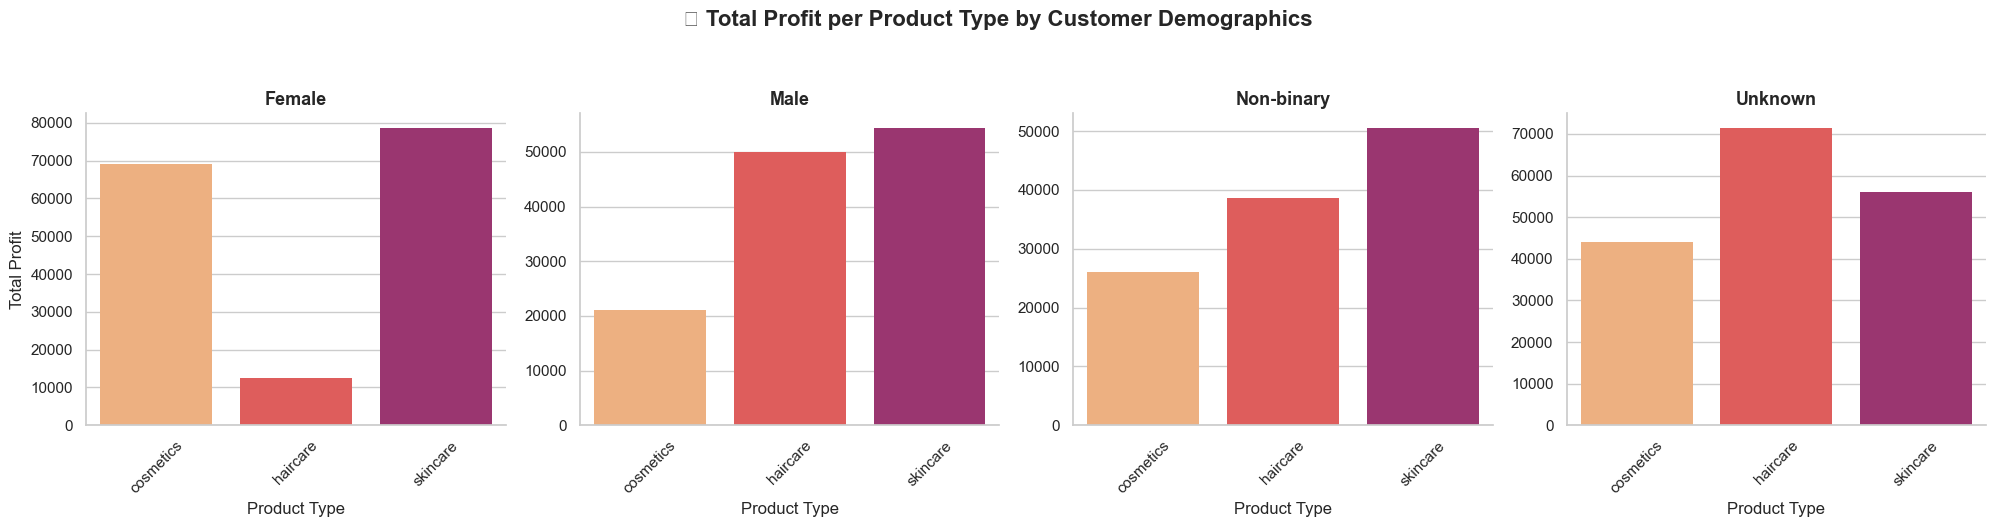

In [143]:
# Group data by Customer Demographics and Product Type
profit_facet_demo = df.groupby(['Customer demographics', 'Product type'])['Profit'].sum().reset_index()

# Create the facet plot
g = sns.catplot(
    data=profit_facet_demo,
    x='Product type',
    y='Profit',
    col='Customer demographics',
    kind='bar',
    col_wrap=4,
    height=5,
    aspect=1,
    sharey=False,
    edgecolor='none'
)

# Generate colors using colormap (you can change 'viridis' to other colormaps like 'plasma', 'Set2', etc.)
cmap = plt.get_cmap('flare')  # You can replace 'viridis' with any other colormap
num_categories = len(profit_facet_demo['Product type'].unique())  # Number of product types
colors = [cmap(i / num_categories) for i in range(num_categories)]  # Generate a list of colors

# Apply custom colors to each facet
for ax in g.axes.flat:
    for i, patch in enumerate(ax.patches):
        color = colors[i % len(colors)]  # Apply different color to each bar
        patch.set_facecolor(color)

# Titles and labels
g.set_titles("{col_name}", size=13, fontweight='bold')
g.set_axis_labels("Product Type", "Total Profit")
g.fig.suptitle("💰 Total Profit per Product Type by Customer Demographics", fontsize=16, fontweight='bold', y=1.05)

# Rotate x-axis labels for clarity
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **Graph insights**:
- **Female**:
   - Skincare and cosmetics are the most contributing product types in its total profits while haircare have the least contribution.
- **Male**:
   - Skincare and haircare are the most contributing product types in its total profits while cosmetics have the least contribution.
- **Non_binary**:
   - Skincare is the most contributing product type in its total profits while cosmetics and haircare have the least contribution.
- **Unknown**:
   - Haircare is the most contributing product type in its total profits while cosmetics and skincare have the least contribution.
> **Conclusion**:
       - Cosmetics is the least contributing product type in profits while skincare products have higher contribution **again** might be due to different demand preferences or difference in average price per product type or quantity demanded.

## What is Total profit for each product type?

In [144]:
profitforpro= foreach_sum('Product type','Profit')\
.rename(columns={'Profit':'Total profit'})\
.sort_values(by='Total profit', ascending=False)
profitforpro

,Product type,Total profit
2,skincare,239472.048328
1,haircare,172606.955095
0,cosmetics,160244.331084


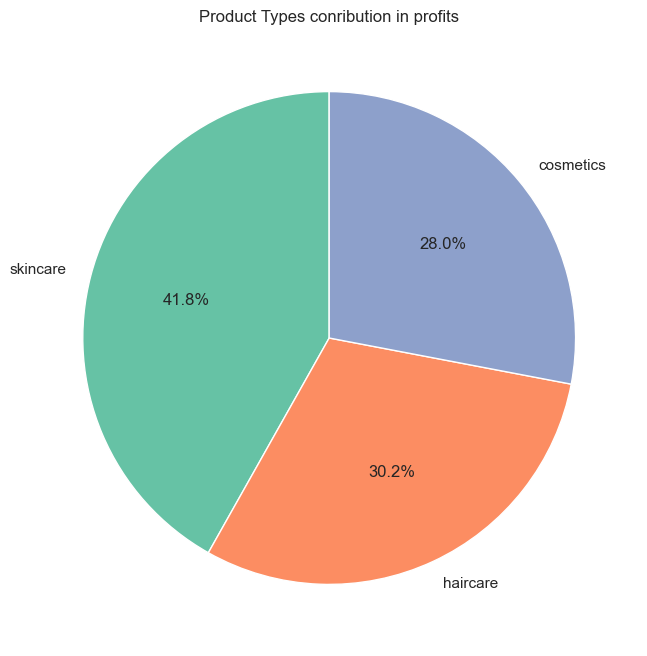

In [145]:
colors = sns.color_palette('Set2', len(profitforpro ))
profitforpro .set_index('Product type')['Total profit'].plot.pie(
    autopct='%1.1f%%',
    figsize=(8,8),
    colors=colors,
    startangle=90,
)

plt.title('Product Types conribution in profits')
plt.ylabel('')
plt.show()


### **Insights**:
  As expected, Skincare has the highest contribution proportion among all the product types as it contributes by 41.8~ 42% over all, following it haircare products then cosmetics with really near proportion (30%, 28%) inorder.

which means that skincare products are the most demanded, have the highest price per item, or just it's the current trend in most of the regions as shown above.

## Product types sales

In [146]:
avg_Price_perproduct= foreach_avg('Product type','Price')\
.rename(columns={'Price':'AVG_Price'})\
.sort_values(by='AVG_Price', ascending=False)
avg_Price_perproduct

,Product type,AVG_Price
0,cosmetics,57.361058
2,skincare,47.259329
1,haircare,46.014279


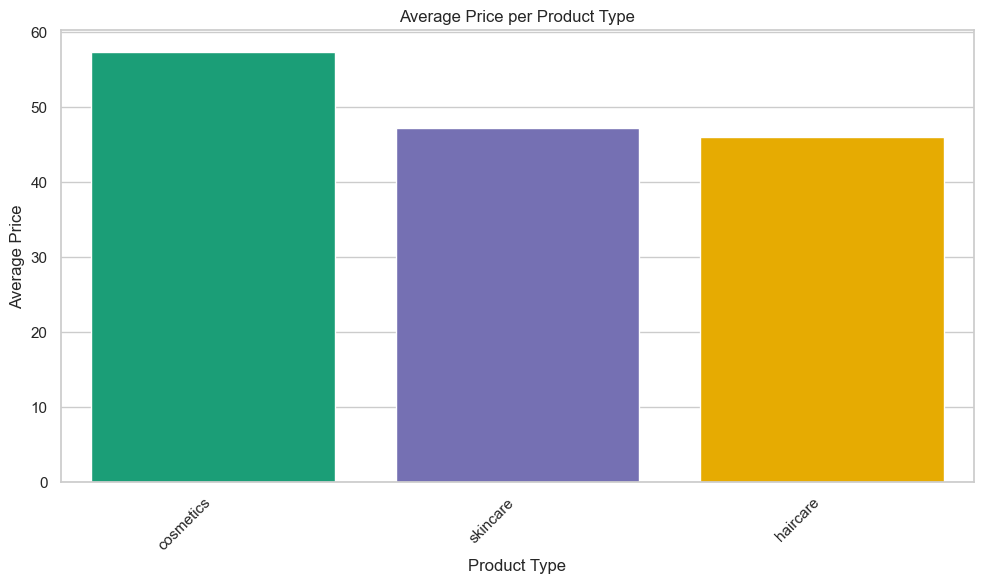

In [147]:
cmap = plt.get_cmap('Dark2')
num_categories = len(avg_Price_perproduct['Product type'].unique())  # Number of product types
colors = [cmap(i / num_categories) for i in range(num_categories)]  # Generate a list of colors based on product type

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=avg_Price_perproduct,
    x='Product type',
    y='AVG_Price',

)

# Apply custom colors to each bar
for i, patch in enumerate(barplot.patches):
    color = colors[i % len(colors)]
    patch.set_facecolor(color)

# Title and labels
plt.title('Average Price per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Number of products sold for each product type

In [148]:
productssold= foreach_sum('Product type','Number of products sold')\
.sort_values(by='Number of products sold', ascending = False)
productssold

,Product type,Number of products sold
2,skincare,20731
1,haircare,13611
0,cosmetics,11757


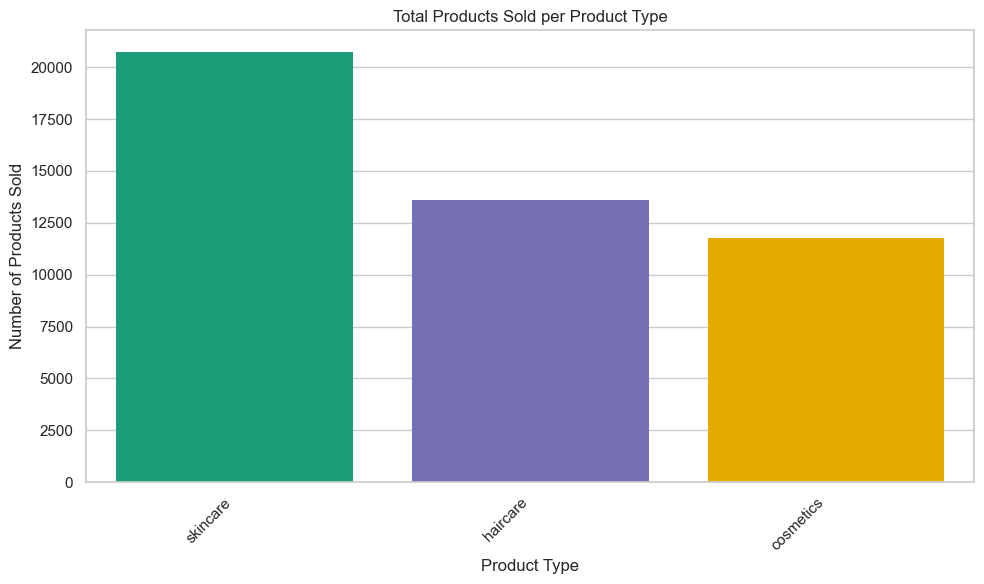

In [149]:
cmap = plt.get_cmap('Dark2')
num_categories = len(productssold['Product type'].unique())  # Number of product types
colors = [cmap(i / num_categories) for i in range(num_categories)]  # Generate a list of colors based on product type

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=productssold,
    x='Product type',
    y='Number of products sold',
    edgecolor='none'  # Remove edge color for cleaner appearance
)

# Apply custom colors to each bar
for i, patch in enumerate(barplot.patches):
    color = colors[i % len(colors)]  # Apply different color to each bar
    patch.set_facecolor(color)

# Title and labels
plt.title('Total Products Sold per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Products Sold')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


### **From the 2 previous graphs now it's obvious**:
   - However, **Cosmetics products** have the highest average price per unit, but it has the least contribution in total profits Because it's the *least sold*
   - However, **Skincare products** don't have the highest average price per unit, but it contributes the most in total profits because it's the *most sold*

→ **Profits conclusion**:
   -  Cosmetics are the least contributing product type in total profits due to demand issues (least sold) might be because of sales issues, quality issues, being expensive or just customer preferences.
   - Skincare are the most contributing product type in total profits since it's highly demanded (most sold) might be due to a combination of high quality and affordable pricing.

## What affects the total cost most?

In [150]:
#Creating a total costs column
df['Total cost'] = df['Manufacturing costs'] + df['Shipping costs']

In [151]:
#Correlation between Manufacturing cost and total cost
corr1 = df['Total cost'].corr(df['Manufacturing costs'])
corr1

np.float64(0.9958463749419262)

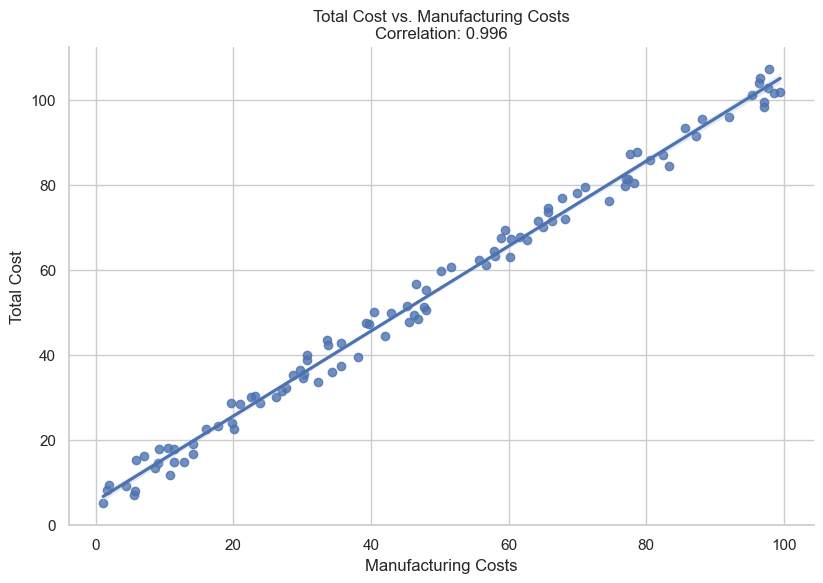

In [152]:
#corr1 (Correlation between Manufacturing cost and total cost) scatter visual
sns.lmplot(data=df, x='Manufacturing costs', y='Total cost', height=6, aspect=1.4)
plt.title(f'Total Cost vs. Manufacturing Costs\nCorrelation: {corr1:.3f}')
plt.xlabel('Manufacturing Costs')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()



In [153]:
#Correlation between Shipping cost and total cost
corr2  = df['Total cost'].corr(df['Shipping costs'])
corr2

np.float64(0.0970064440763461)

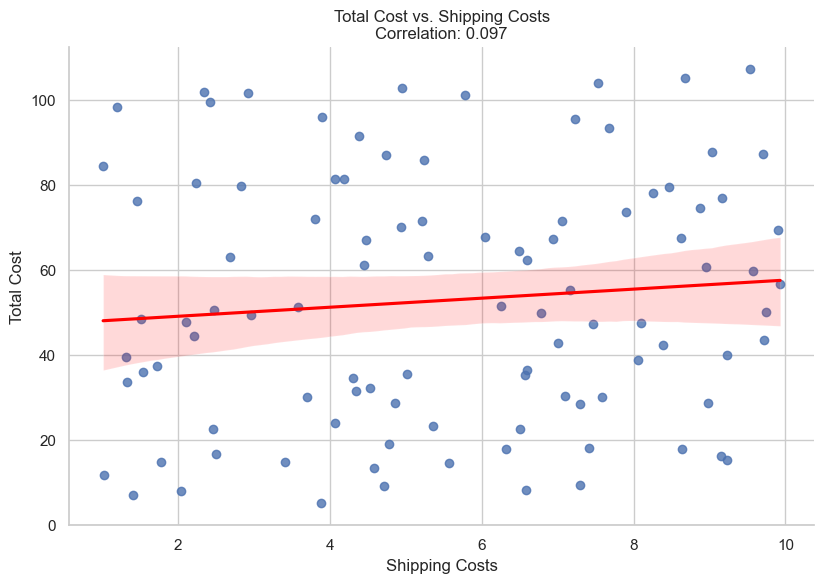

In [154]:
#corr2 (Correlation between Shipping cost and total cost) scatter visual
sns.lmplot(data=df, x='Shipping costs', y='Total cost', height=6, aspect=1.4, line_kws={"color": "red"})
plt.title(f'Total Cost vs. Shipping Costs\nCorrelation: {corr2:.3f}')
plt.xlabel('Shipping Costs')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()


### **Insights from the 2 previous visuals**:
  - Manufacturing cost is almost the unique factor that affects the total costs positively with correlation (~ 0.996) while there's almost no relation between shipping cost and total costs with correlation (~ 0.097)

  → **Total costs increase immediately by the rise of Manufacturing costs.**

## Top 5 products units with the highest profitability and the lowest total time & total costs

In [155]:
p = df.sort_values(by=['Profit','Total cost', 'Total Lead Time'],ascending=[False, True, True])
p.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Defect rates,Transportation modes,Routes,Costs,Availability cluster,Stock cluster,Profit,Total Lead Time,shipping_cost_per_unit,Total cost
51,haircare,SKU51,26.700761,61,154,9866.465458,Male,100,4,52,...,1.772951,Road,Route A,694.982318,High,High,9847.492129,29,0.031058,18.973329
38,cosmetics,SKU38,52.075931,75,705,9692.318040,Non-binary,69,1,88,...,0.613327,Air,Route B,339.672870,High,High,9677.151415,17,0.013101,15.166625
31,skincare,SKU31,50.847393,28,168,9655.135103,Male,6,17,44,...,2.989000,Rail,Route C,609.379207,Low,Low(at risk),9592.204296,12,0.015950,62.930807
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,4.580593,Air,Route C,141.920282,Low,Low(at risk),9539.007127,29,1.006810,38.742499
32,skincare,SKU32,79.209936,43,781,9571.550487,Unknown,89,13,64,...,1.946036,Road,Route A,761.173910,Low,High,9535.258915,11,0.008450,36.291572


## Is there a relation between Manufacturing time and its costs?

In [156]:
manufacturing_lead_time = df['Manufacturing lead time']
correlation =df['Manufacturing lead time'].corr(df['Manufacturing costs']).round(3)
correlation


np.float64(-0.158)

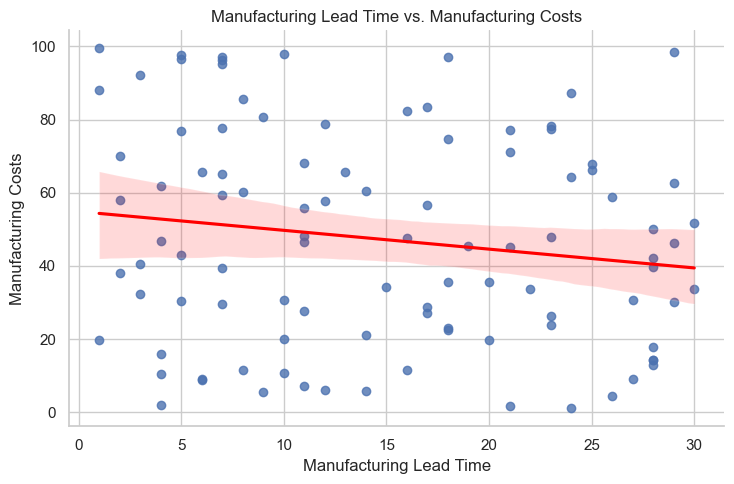

In [157]:
sns.lmplot(data=df, x='Manufacturing lead time', y='Manufacturing costs', height=5, aspect=1.5, line_kws={'color': 'red'})
plt.title('Manufacturing Lead Time vs. Manufacturing Costs')
plt.xlabel('Manufacturing Lead Time')
plt.ylabel('Manufacturing Costs')
plt.tight_layout()
plt.show()


### **Insights**:

There's almost no relation (weak -ve relation) between the manufacturing time and manufacturing costs As *time increases*, the *cost slightly decreases*.

## Transportation modes impact on time & cost of shipping

In [158]:
Transportation_modes_impact = pd.pivot_table(df, index='Transportation modes', values=['Shipping times','Shipping costs'], aggfunc='mean').reset_index().rename(columns={'Shipping costs':'AVG Shipping_costs', 'Shipping times':'AVG Shipping times'}).sort_values(by=['AVG Shipping times','AVG Shipping_costs'], ascending=False)
Transportation_modes_impact

,Transportation modes,AVG Shipping_costs,AVG Shipping times
3,Sea,4.970294,7.117647
1,Rail,5.469098,6.571429
0,Air,6.017839,5.115385
2,Road,5.542115,4.724138


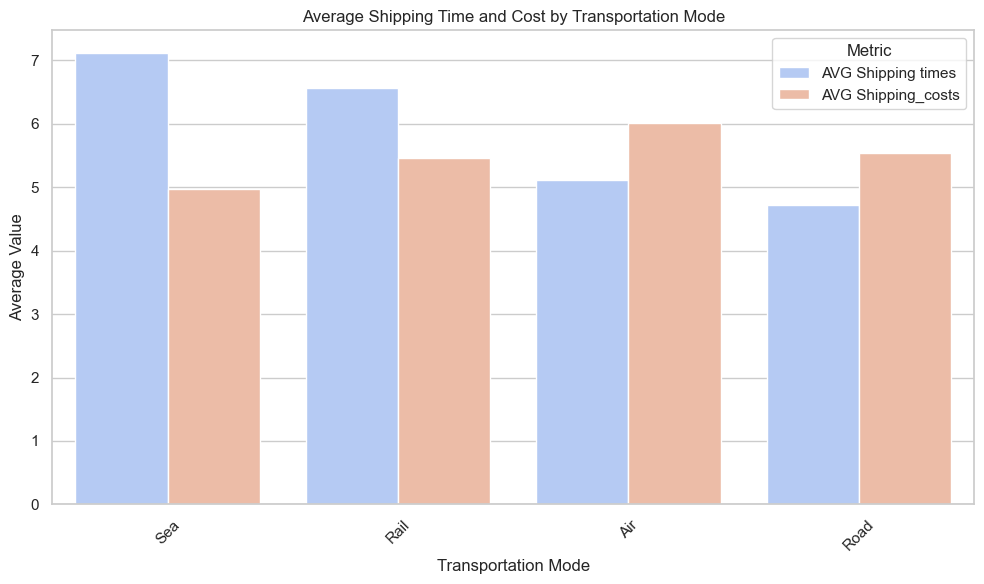

In [159]:
melted = Transportation_modes_impact.melt(id_vars='Transportation modes',
                                           value_vars=['AVG Shipping times', 'AVG Shipping_costs'],
                                           var_name='Metric', value_name='Average')
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Transportation modes', y='Average', hue='Metric', palette='coolwarm')
plt.title('Average Shipping Time and Cost by Transportation Mode')
plt.ylabel('Average Value')
plt.xlabel('Transportation Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.show()


### **Insights**:
  - **Sea** take longest for shipping while they are the cheapest transportation modes (slow but cost-effective)
  - **Rail** lower time and higher cost than *sea* (faster with a small increase in cost)
  - **Air** Has the highest cost with lower time than *rail & sea*
  - **Road** More Efficient in time, but not the cheapest—possibly ideal for shorter distances

**→ Conclusion**:
  - Faster transportation modes tend to have higher costs (e.g., Air and Road)
  - **Sea Transport**: Best for **non-urgent**, **cost-sensitive** shipments
  - **Air Transport**: Best for **urgent**, **time-sensitive** deliveries.

## Shipping costs and Carriers

In [160]:
#Calculating average shipping cost for each shipping carrier
avg_shipping_cost = foreach_avg('Shipping carriers', 'Shipping costs')\
.rename(columns={'Shipping costs':'AVG_Shipping costs'})\
.sort_values(by='AVG_Shipping costs', ascending=False)
avg_shipping_cost

,Shipping carriers,AVG_Shipping costs
2,Carrier C,5.599292
0,Carrier A,5.554923
1,Carrier B,5.509247


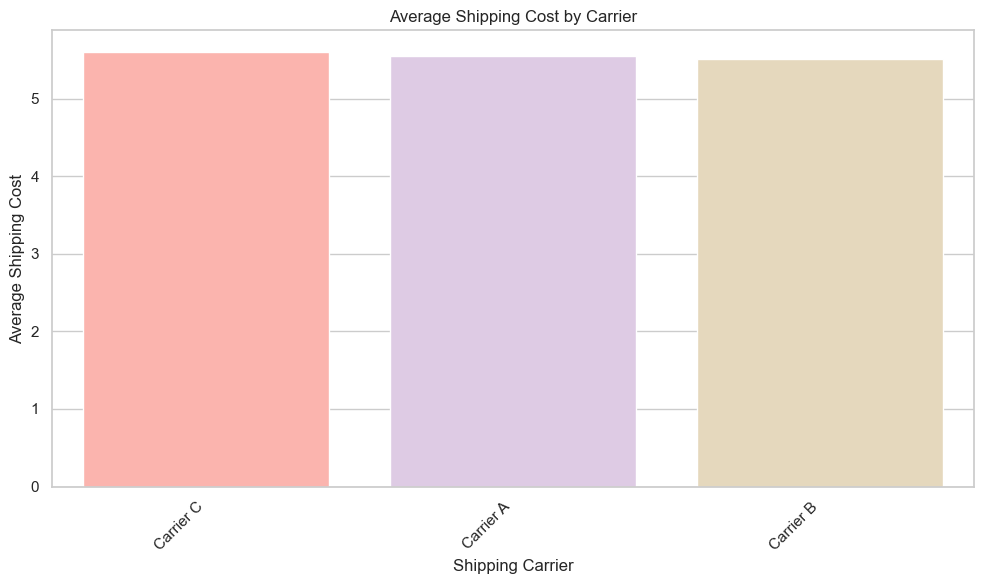

In [161]:
cmap = plt.get_cmap('Pastel1')
num_categories = len(avg_shipping_cost['Shipping carriers'].unique())  # Number of shipping carriers
colors = [cmap(i / num_categories) for i in range(num_categories)]  # Generate a list of colors based on carriers

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=avg_shipping_cost,
    x='Shipping carriers',
    y='AVG_Shipping costs',

)

# Apply custom colors to each bar
for i, patch in enumerate(barplot.patches):
    color = colors[i % len(colors)]  # Apply different color to each bar
    patch.set_facecolor(color)

# Title and labels
plt.title('Average Shipping Cost by Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Average Shipping Cost')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


 #### **Notes** :
All shipping carriers almost have the same average shipping cost

## Lead time and defect rates for each supplier

In [162]:
leadsupplier = foreach_avg('Supplier name','Lead time')\
.rename(columns={'Lead time': 'AVG lead time'})\
.sort_values(by='AVG lead time', ascending=True)
leadsupplier['AVG lead time'] = leadsupplier['AVG lead time'].round().astype(int).astype(str)+" Days"
leadsupplier

,Supplier name,AVG lead time
0,Supplier 1,15 Days
3,Supplier 4,15 Days
4,Supplier 5,18 Days
1,Supplier 2,19 Days
2,Supplier 3,20 Days


In [164]:
AVGdefectby_supplier = (
    foreach_avg('Supplier name', 'Defect rates')
    .rename(columns={'Defect rates': 'AVG defect rate'})
    .sort_values(by='AVG defect rate', ascending=False)
)

AVGdefectby_supplier['AVG defect rate'] = AVGdefectby_supplier['AVG defect rate'].apply(
    lambda x: f"{x:.2f}%" if pd.notnull(x) else ''
)

AVGdefectby_supplier


,Supplier name,AVG defect rate
4,Supplier 5,2.67%
2,Supplier 3,2.47%
1,Supplier 2,2.36%
3,Supplier 4,2.34%
0,Supplier 1,1.80%


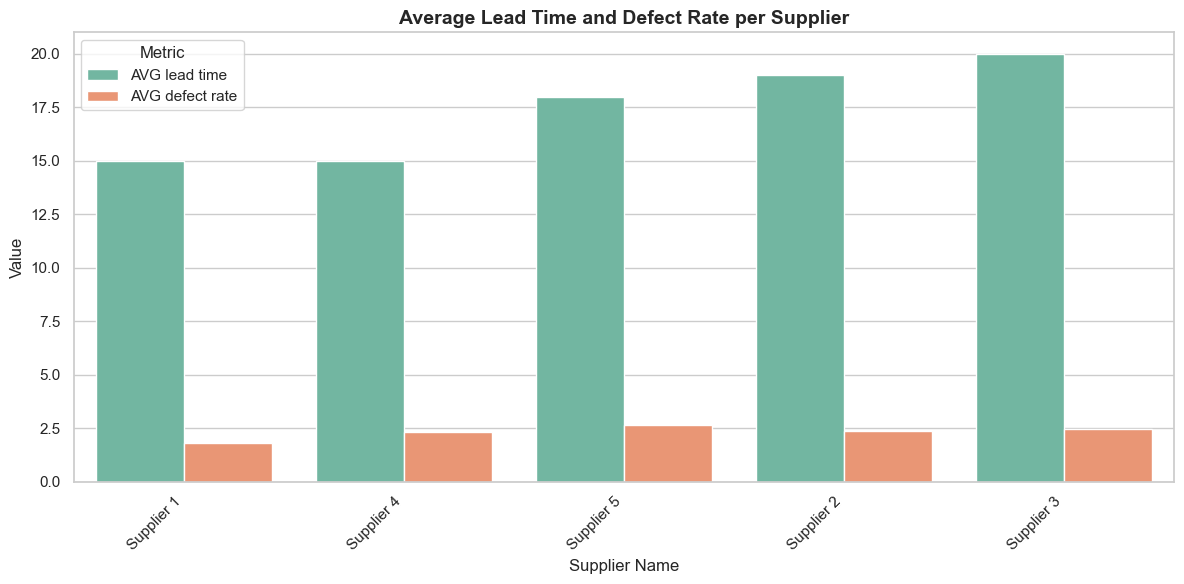

In [165]:
# Preprocess lead time data
leadsupplier_clean = leadsupplier.copy()
leadsupplier_clean['AVG lead time'] = leadsupplier_clean['AVG lead time'].str.replace(" Days", "").astype(int)

# Preprocess defect rate data
AVGdefectby_supplier_clean = AVGdefectby_supplier.copy()
AVGdefectby_supplier_clean['AVG defect rate'] = AVGdefectby_supplier_clean['AVG defect rate'].str.rstrip('%').astype(float)

# Merge on Supplier name
merged = pd.merge(leadsupplier_clean.reset_index(), AVGdefectby_supplier_clean.reset_index(), on='Supplier name')

# Melt for grouped barplot
plot_df = pd.melt(
    merged,
    id_vars='Supplier name',
    value_vars=['AVG lead time', 'AVG defect rate'],
    var_name='Metric',
    value_name='Value'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Supplier name', y='Value', hue='Metric', palette='Set2')

plt.title('Average Lead Time and Defect Rate per Supplier', fontsize=14, fontweight='bold')
plt.xlabel('Supplier Name')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Insights**:
   - **Suppliers 3 & 2** Take the largest lead time to deliver products
   - **Suppliers 1 & 4** Take the shortest lead time to deliver product
   - **Supplier 1** has the lowest defect rate (~1.5 units) — best quality performance.
   - **Supplier 5** has the highest defect rate (~2.7) — potential quality risk.

**→ Best of all**:
   - *Supplier 1* with(Shortest lead time & lowest defect rate)

**→ worst of all**:
   - *Supplier 3* with(Longest lead time & relatively high defect rate)

---

## Routes analysis

In [166]:
shippingroute = foreach_avg('Routes','Shipping costs')\
.rename(columns={'Shipping costs':'AVG Shipping costs'})\
.sort_values(by='AVG Shipping costs', ascending=False).round(1)
shippingroute

,Routes,AVG Shipping costs
2,Route C,5.9
1,Route B,5.6
0,Route A,5.4


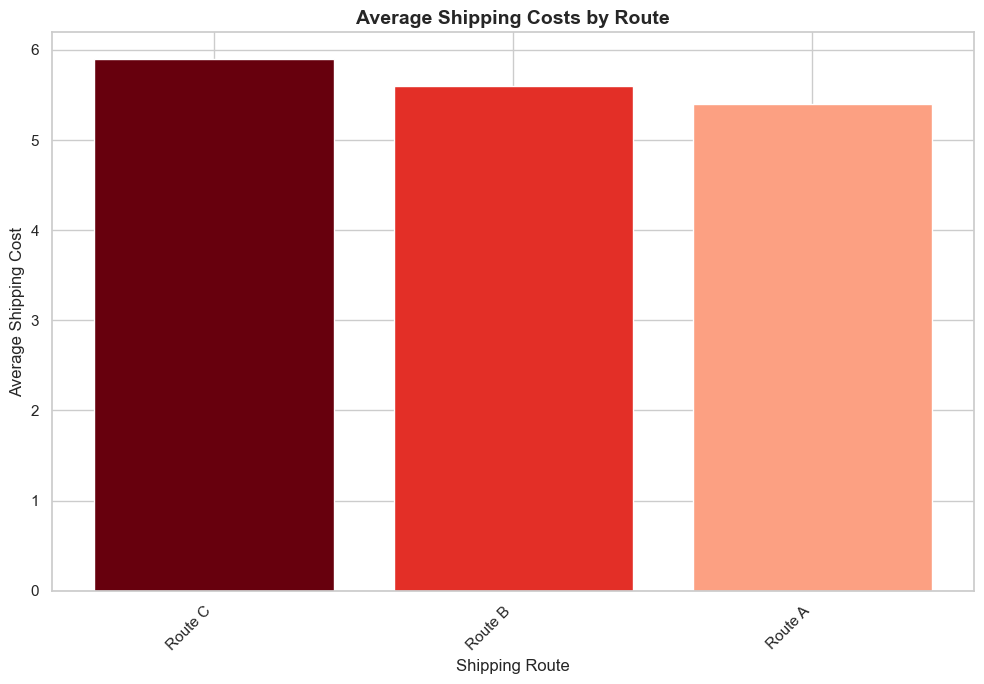

In [167]:
# Reset index to access 'Routes' as a column
shippingroute_reset = shippingroute.reset_index()

# Get number of bars
num_bars = len(shippingroute_reset)

# Use 'Reds_r' colormap for shades of red
cmap = plt.get_cmap('Reds_r')
colors = [cmap(i / num_bars) for i in range(num_bars)]

# Plot
plt.figure(figsize=(10, 7))
plt.bar(
    shippingroute_reset['Routes'],
    shippingroute_reset['AVG Shipping costs'],
    color=colors
)

# Labels & formatting
plt.title('Average Shipping Costs by Route', fontsize=14, fontweight='bold')
plt.xlabel('Shipping Route')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3 routes almost have the same cost

## Does higher manufacturing costs means lower defect rates?

In [168]:
defect_cost_correlation = df['Defect rates'].corr(df['Manufacturing costs']).round(3)
defect_cost_correlation

np.float64(-0.008)

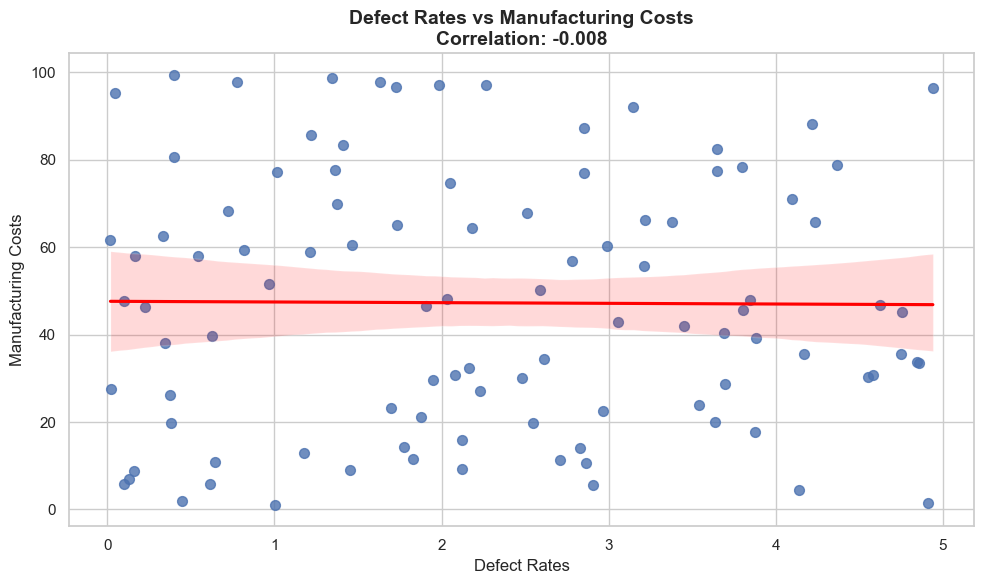

In [169]:
# Regression plot for Defect rates vs Manufacturing costs
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Defect rates'], y=df['Manufacturing costs'], scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title(f'Defect Rates vs Manufacturing Costs\nCorrelation: {defect_cost_correlation}', fontsize=14, fontweight='bold')
plt.xlabel('Defect Rates')
plt.ylabel('Manufacturing Costs')

plt.tight_layout()
plt.show()


 ### **Insights**:
> There is no relationship between defect rates and manufacturing cost (High Manufacturing costs doesn't lead to lower or higher defect rates)

## Inspection results and defect rates per product type

In [171]:
piv = pd.pivot_table(
    df,
    index='Product type',
    values='Inspection results',
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index().rename(columns={'Inspection results': 'frequent inspection result'})
piv

,Product type,frequent inspection result
0,cosmetics,Fail
1,haircare,Pending
2,skincare,Pending


> **Notes**:
  - Most of cosmetics products fail in quality tests
  - Most of haircare and skincare products are pending

  → **cosmetics** quality is the lowest this might explain why it's least sold as it doesn't match quality standards

In [172]:
avg_defects = foreach_avg('Product type','Defect rates')\
.rename(columns={'Defect rates':'AVG defect rate'}) \
.sort_values(by='AVG defect rate', ascending=False)
avg_defects['AVG defect rate'] = avg_defects['AVG defect rate'].apply(
    lambda x: f"{x:.2f}%" if pd.notnull(x) else ''
)
avg_defects

,Product type,AVG defect rate
1,haircare,2.48%
2,skincare,2.33%
0,cosmetics,1.92%


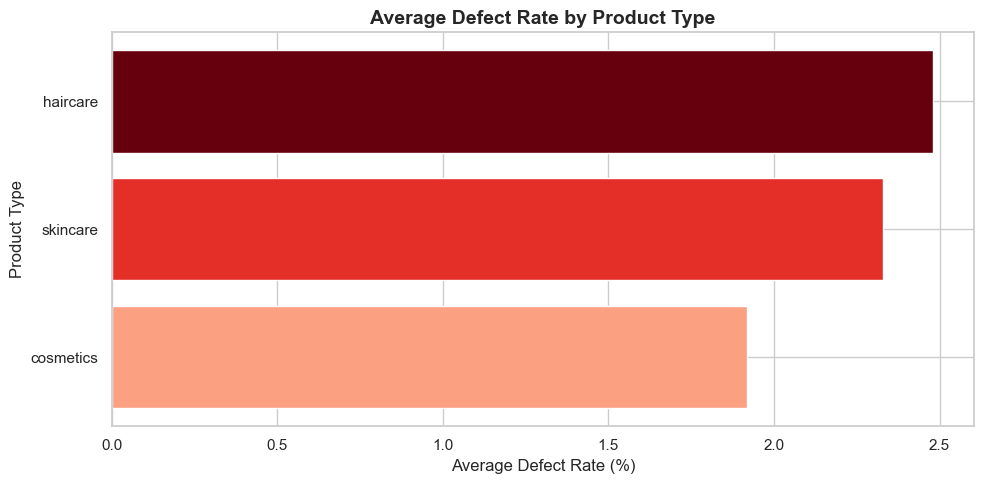

In [173]:
# Prepare data
avg_defects_plot = avg_defects.copy()
avg_defects_plot['Defect Rate (%)'] = avg_defects_plot['AVG defect rate'].str.rstrip('%').astype(float)

# Sort by defect rate descending
avg_defects_plot = avg_defects_plot.sort_values(by='Defect Rate (%)', ascending=False)

# Generate red shades
num_bars = len(avg_defects_plot)
cmap = plt.get_cmap('Reds_r')
colors = [cmap(i / num_bars) for i in range(num_bars)]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(
    avg_defects_plot['Product type'],
    avg_defects_plot['Defect Rate (%)'],
    color=colors
)

# Invert Y-axis to show highest at top
plt.gca().invert_yaxis()

# Labels
plt.title('Average Defect Rate by Product Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Defect Rate (%)')
plt.ylabel('Product Type')

plt.tight_layout()
plt.show()


> **Insights**: **Haircare products** are the most defective while **Cosmetics** are the least despite having frequent failure inspection results which means its defects may be critical (can't be ignored according to quality standards)

In [174]:
df.to_csv("edited_data.csv", index=False)